In [1]:
import pandas as pd

# Load the data
file_path = "/Users/saurabhwashimkar/Downloads/DISSERTATION/DATASET/transfer_97474_files_43762347/sorter_viber_1672531200.log"
data = pd.read_csv(file_path, sep=",", header=0)


/var/folders/mq/3ywm8_wd6hn_8_5nq7qzc_vh0000gn/T/ipykernel_34055/174970943.py:5: DtypeWarning: Columns (5,7,8,35,38,55) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep=",", header=0)


In [2]:
# Convert columns to numeric, errors='coerce' ensures non-numeric values are set to NaN
numeric_cols = data.columns  # We'll try converting all columns to numeric
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')


In [3]:
# Fill NaN values with the mean of each column
data_filled = data.fillna(data.mean())


In [4]:
# Display the filled data
data_filled.head()
non_numeric_entries = {}

for col in data.columns:
    # Check non-numeric entries in each column
    non_numeric_values = data[col][~data[col].apply(lambda x: isinstance(x, (int, float)) and not isinstance(x, bool))]
    if not non_numeric_values.empty:
        non_numeric_entries[col] = non_numeric_values.unique()

print(non_numeric_entries)
data.dtypes
data = pd.read_csv(file_path, sep=",", header=0)
print(data['_time'].head(10))


{}
0    2023-01-01 21:30:35.336 UTC
1    2023-01-01 21:28:03.587 UTC
2    2023-01-01 21:26:16.736 UTC
3    2023-01-01 21:25:53.986 UTC
4    2023-01-01 21:25:35.987 UTC
5    2023-01-01 21:21:10.186 UTC
6    2023-01-01 21:16:53.386 UTC
7    2023-01-01 21:15:40.787 UTC
8    2023-01-01 21:15:29.387 UTC
9    2023-01-01 21:14:07.787 UTC
Name: _time, dtype: object


/var/folders/mq/3ywm8_wd6hn_8_5nq7qzc_vh0000gn/T/ipykernel_34055/3653827381.py:13: DtypeWarning: Columns (5,7,8,35,38,55) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep=",", header=0)


In [5]:
# Convert the '_time' column to a datetime format
data['_time'] = pd.to_datetime(data['_time'].str.replace(' UTC', ''), format='%Y-%m-%d %H:%M:%S.%f', utc=True)



In [6]:
# Print the first few rows to verify
print(data['_time'].head(10))


0   2023-01-01 21:30:35.336000+00:00
1   2023-01-01 21:28:03.587000+00:00
2   2023-01-01 21:26:16.736000+00:00
3   2023-01-01 21:25:53.986000+00:00
4   2023-01-01 21:25:35.987000+00:00
5   2023-01-01 21:21:10.186000+00:00
6   2023-01-01 21:16:53.386000+00:00
7   2023-01-01 21:15:40.787000+00:00
8   2023-01-01 21:15:29.387000+00:00
9   2023-01-01 21:14:07.787000+00:00
Name: _time, dtype: datetime64[ns, UTC]


In [7]:
# Summary statistics for all columns
summary_stats = data.describe()
print(summary_stats)
import matplotlib.pyplot as plt



          carrier_id  height_1_min_mm  height_1_rms_mm       loop_id  \
count  108296.000000    108001.000000    108015.000000  1.082960e+05   
mean      305.900661        19.006997         6.010712  2.023010e+13   
std       118.681140         0.608688         1.408881  7.626626e+01   
min       101.000000        17.502000         4.116000  2.023010e+13   
25%       203.000000        18.632000         5.123000  2.023010e+13   
50%       306.000000        18.914000         5.288000  2.023010e+13   
75%       409.000000        19.261000         6.665000  2.023010e+13   
max       511.000000        22.896000        10.409000  2.023010e+13   

       proxy_1_sorter_speed_m/s  vibration_1_amplitude_rb_bpfi_m/s^2  \
count             107733.000000                        107646.000000   
mean                   1.999317                             3.196706   
std                    0.026844                             2.072754   
min                    0.000000                             0.5

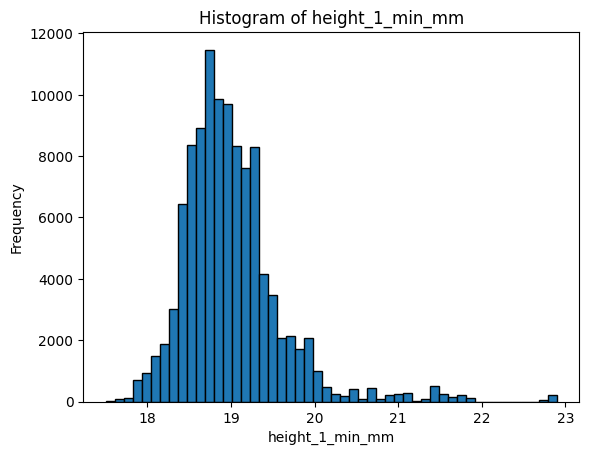

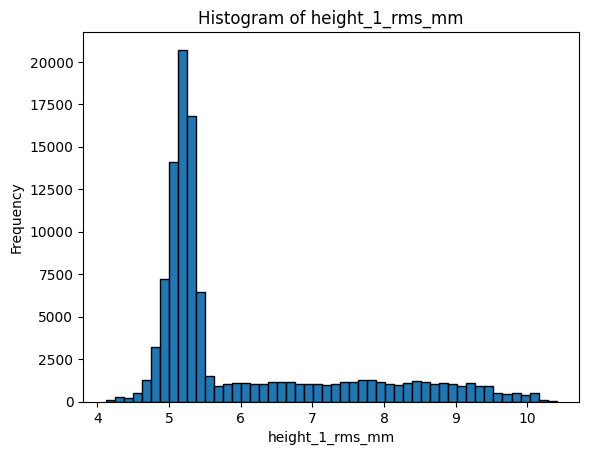

In [8]:
# Plotting histograms for some columns
columns_to_plot = ['height_1_min_mm', 'height_1_rms_mm']  # Add more columns as needed
for col in columns_to_plot:
    plt.hist(data[col], bins=50, edgecolor='k')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
import seaborn as sns



In [9]:
# Correlation matrix
correlation_matrix = data[columns_to_plot].corr()



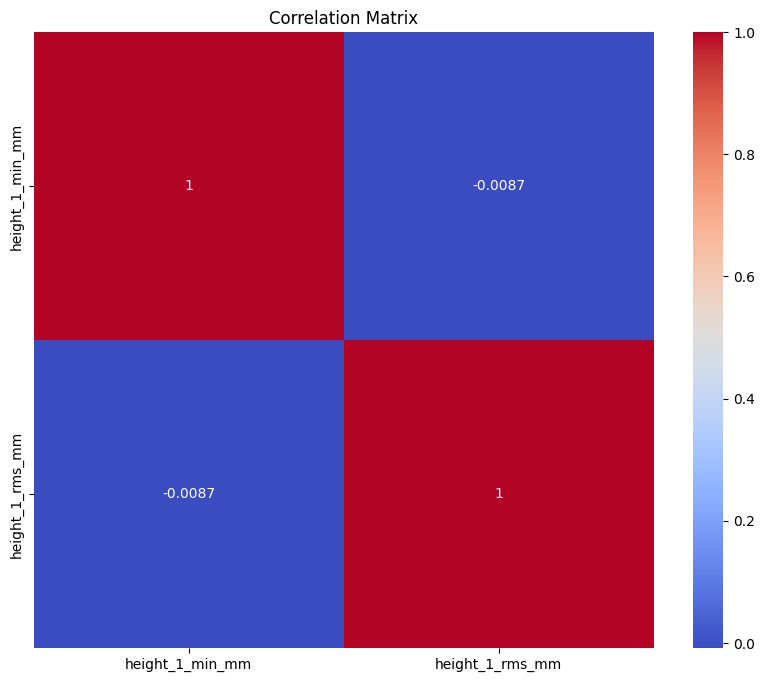

In [10]:
# Plotting heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


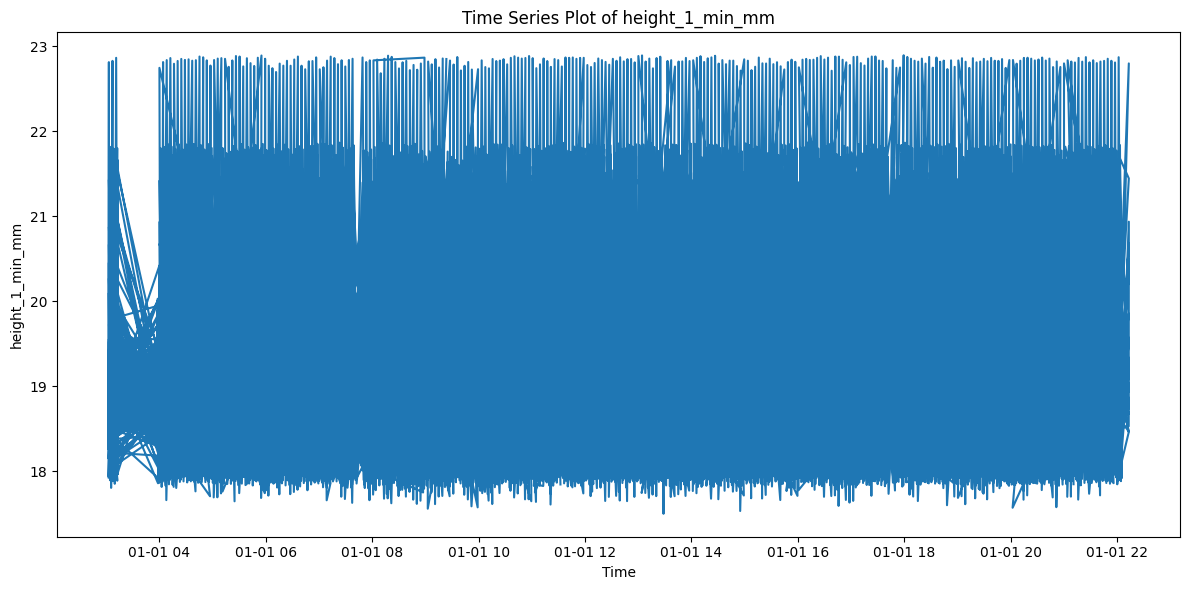

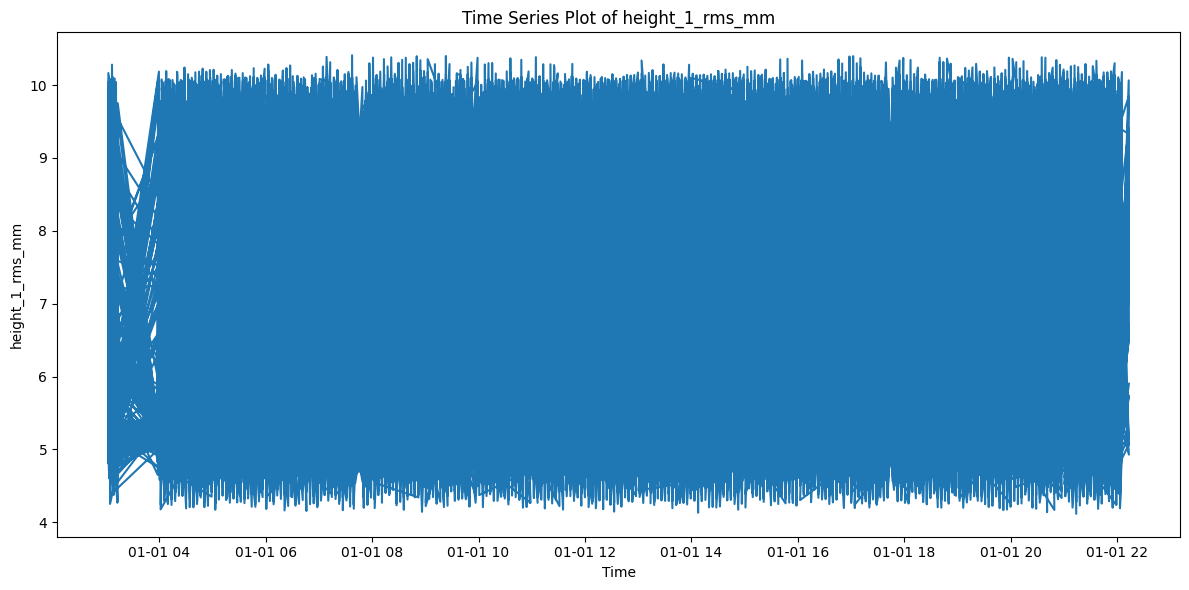

In [11]:
# Time series plot for some columns
for col in columns_to_plot:
    plt.figure(figsize=(12,6))
    plt.plot(data['_time'], data[col])
    plt.title(f'Time Series Plot of {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


In [12]:
# Columns of interest
cols_of_interest = ['vibration_1_amplitude_m/s^2', 'vibration_2_amplitude_m/s^2', 'height_1_min_mm', 'height_1_rms_mm']



In [13]:
# Generate summary statistics for the selected columns
summary_stats = data[cols_of_interest].describe()

print(summary_stats)




       vibration_2_amplitude_m/s^2  height_1_min_mm  height_1_rms_mm
count                107922.000000    108001.000000    108015.000000
mean                      0.571419        19.006997         6.010712
std                       0.108391         0.608688         1.408881
min                       0.024000        17.502000         4.116000
25%                       0.497000        18.632000         5.123000
50%                       0.569000        18.914000         5.288000
75%                       0.642000        19.261000         6.665000
max                       1.229000        22.896000        10.409000


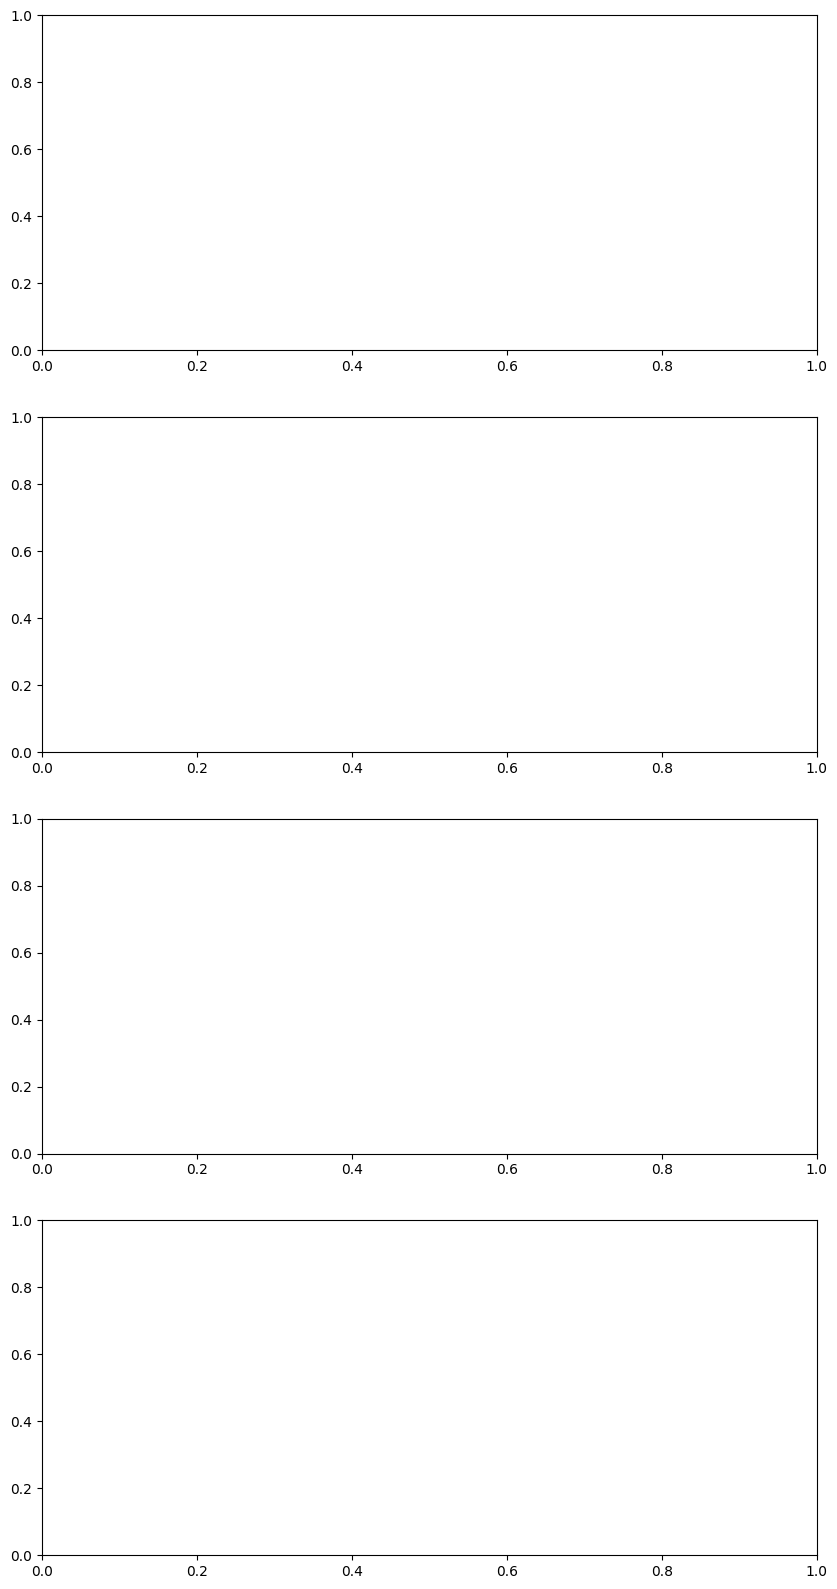

In [14]:
import matplotlib.pyplot as plt

# Setting up the figure and axes
fig, axs = plt.subplots(len(cols_of_interest), 1, figsize=(10, 20))


vibration_1_amplitude_m/s^2    357
vibration_2_amplitude_m/s^2    374
height_1_min_mm                295
height_1_rms_mm                281
dtype: int64
vibration_1_amplitude_m/s^2     object
vibration_2_amplitude_m/s^2    float64
height_1_min_mm                float64
height_1_rms_mm                float64
dtype: object


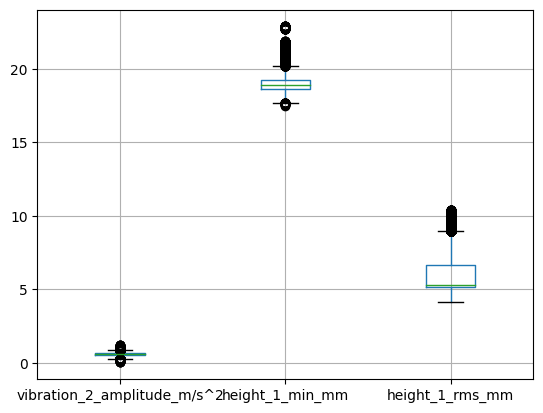

  vibration_1_amplitude_m/s^2  vibration_2_amplitude_m/s^2  height_1_min_mm  \
0                       0.428                        0.682           19.007   
1                       0.327                        0.569           19.321   
2                       0.366                        0.460           19.581   
3                       0.322                        0.647           19.331   
4                       0.498                        0.486           18.734   

   height_1_rms_mm  
0            6.337  
1            5.142  
2            4.840  
3            6.024  
4            5.273  


In [15]:

#Check for NaN values:
print(data[cols_of_interest].isna().sum())


#Check data types:
print(data[cols_of_interest].dtypes)

#Check for outliers:
data[cols_of_interest].boxplot()
plt.show()

#Check the actual values:
print(data[cols_of_interest].head())




In [16]:
# Extract non-numeric entries in the column
non_numeric_values = data['vibration_1_amplitude_m/s^2'][~data['vibration_1_amplitude_m/s^2'].apply(lambda x: isinstance(x, (int, float)) and not isinstance(x, bool))]

# Display unique non-numeric values
unique_non_numeric_values = non_numeric_values.unique()
print(unique_non_numeric_values)


['0.428' '0.327' '0.366' '0.322' '0.498' '0.401' '0.452' '0.432' '0.342'
 '0.436' '0.435' '0.545' '0.332' '0.398' '0.324' '0.427' '0.388' '0.276'
 '0.334' '0.345' '0.312' '0.313' '0.393' '0.222' '0.344' '0.411' '0.328'
 '0.364' '0.272' '0.251' '0.407' '0.542' '0.385' '0.422' '0.287' '0.294'
 '0.325' '0.369' '0.513' '0.277' '0.308' '0.275' '0.547' '0.261' '0.326'
 '0.227' '0.347' '0.529' '0.405' '0.356' '0.585' '0.471' '0.212' '0.454'
 '0.429' '0.423' '0.289' '0.44' '0.265' '0.479' '0.476' '0.288' '0.238'
 '0.376' '0.241' '0.421' '0.329' '0.305' '0.233' '0.314' '0.346' '0.341'
 '0.358' '0.661' '0.352' '0.403' '0.295' '0.387' '0.336' '0.746' '0.4'
 '0.636' '0.466' '0.41' '0.378' '0.337' '0.502' '0.531' '0.449' '0.284'
 '0.537' '0.248' '0.413' '0.437' '0.417' '0.351' '0.309' '0.375' '0.426'
 '0.685' '0.315' '0.511' '0.323' '0.264' '0.386' '0.52' '0.391' '0.495'
 '0.34' '0.489' '0.296' '0.533' '0.451' '0.266' '0.291' '0.673' '0.439'
 '0.372' '0.528' '0.379' '0.445' '0.25' '0.55' '0.27' '0.

In [17]:
def clean_and_convert(value):
    try:
        # Attempt to strip quotes and convert to float
        return float(str(value).replace('"', '').strip())
    except ValueError:
        # If conversion fails, return the original value
        return value

# Apply the function to all columns of the dataframe
for col in data.columns:
    data[col] = data[col].apply(clean_and_convert)

# Verify the data types and changes
print(data.dtypes)


carrier_id                                                          float64
height_1_min_mm                                                     float64
height_1_rms_mm                                                     float64
loop_id                                                             float64
proxy_1_sorter_speed_m/s                                            float64
                                                               ...         
vibration_failure_consecutive_faulty_count_timestamp                float64
vibration_failure_failure_class                                     float64
vibration_failure_failure_score_score                               float64
vibration_failure_sensor_vote_count_timestamp                       float64
_time                                                   datetime64[ns, UTC]
Length: 62, dtype: object


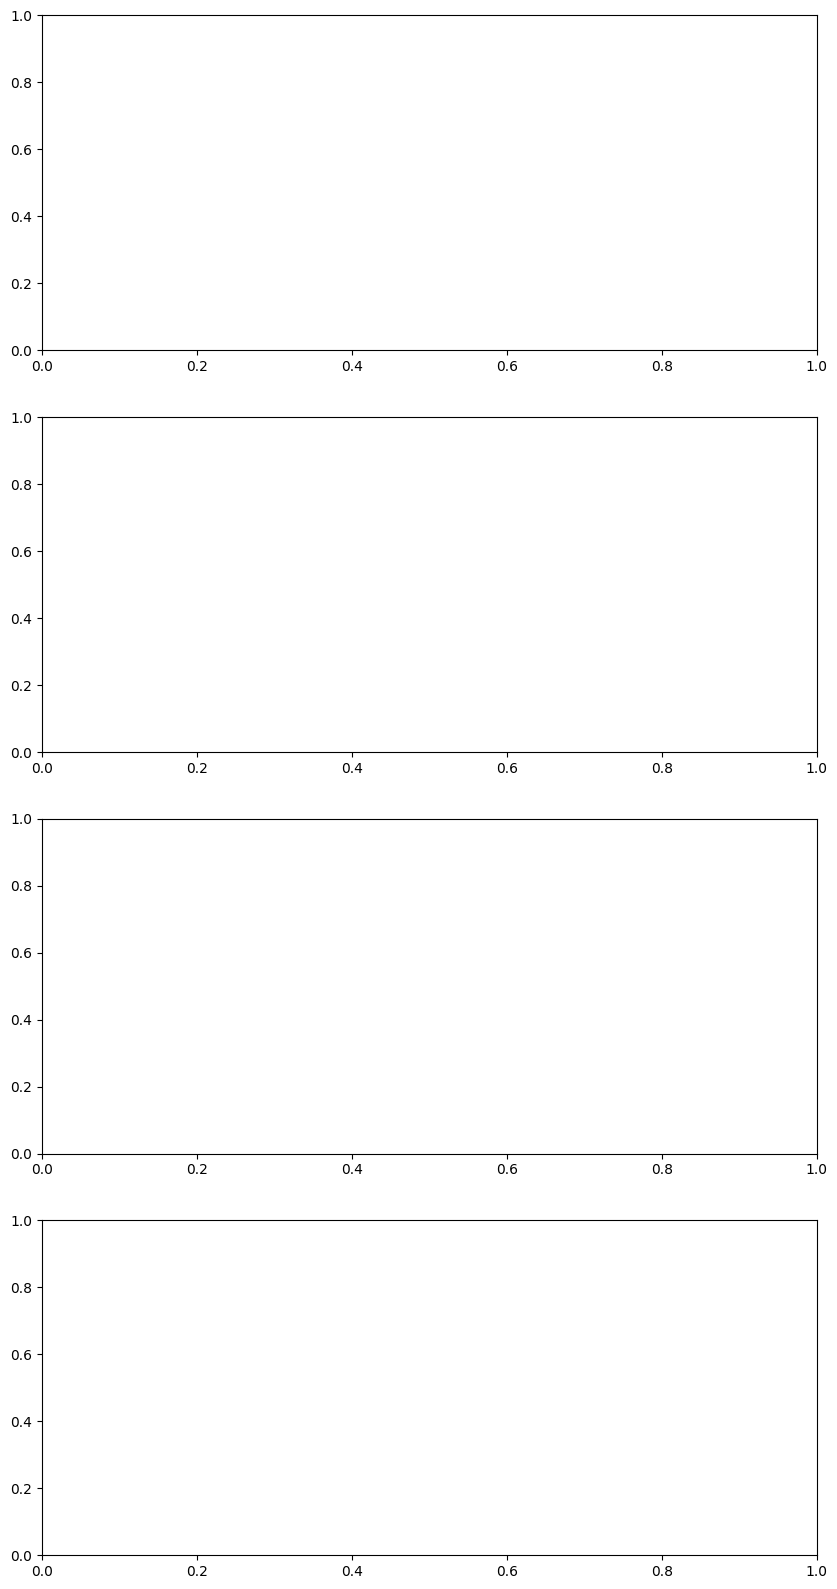

In [18]:
# Setting up the figure and axes
fig, axs = plt.subplots(len(cols_of_interest), 1, figsize=(10, 20))

In [19]:
#Check for NaN values:
print(data[cols_of_interest].isna().sum())




vibration_1_amplitude_m/s^2    357
vibration_2_amplitude_m/s^2    374
height_1_min_mm                295
height_1_rms_mm                281
dtype: int64


vibration_1_amplitude_m/s^2    float64
vibration_2_amplitude_m/s^2    float64
height_1_min_mm                float64
height_1_rms_mm                float64
dtype: object


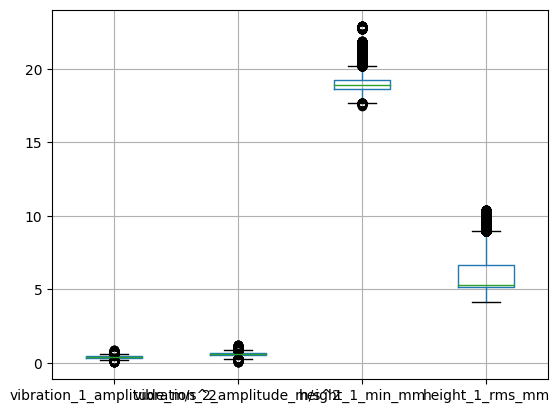

   vibration_1_amplitude_m/s^2  vibration_2_amplitude_m/s^2  height_1_min_mm  \
0                        0.428                        0.682           19.007   
1                        0.327                        0.569           19.321   
2                        0.366                        0.460           19.581   
3                        0.322                        0.647           19.331   
4                        0.498                        0.486           18.734   

   height_1_rms_mm  
0            6.337  
1            5.142  
2            4.840  
3            6.024  
4            5.273  


In [20]:
#Check data types:
print(data[cols_of_interest].dtypes)

#Check for outliers:
data[cols_of_interest].boxplot()
plt.show()

#Check the actual values:
print(data[cols_of_interest].head())

In [21]:
# 1. Remove any quotes around numbers and convert them to actual numbers
data = data.applymap(lambda x: float(x.strip(' "')) if isinstance(x, str) and x.replace('.', '', 1).isdigit() else x)

# 2. Convert all columns to numeric (excluding _time column)
for col in data.columns:
    if col != '_time':
        data[col] = pd.to_numeric(data[col], errors='coerce')

# 3. Replace NaN values across the entire dataframe with the mean of their respective columns
data.fillna(data.mean(), inplace=True)

# Verify the changes
print(data.dtypes)
print(data.isna().sum())


/var/folders/mq/3ywm8_wd6hn_8_5nq7qzc_vh0000gn/T/ipykernel_34055/4258361655.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: float(x.strip(' "')) if isinstance(x, str) and x.replace('.', '', 1).isdigit() else x)


carrier_id                                                          float64
height_1_min_mm                                                     float64
height_1_rms_mm                                                     float64
loop_id                                                             float64
proxy_1_sorter_speed_m/s                                            float64
                                                               ...         
vibration_failure_consecutive_faulty_count_timestamp                float64
vibration_failure_failure_class                                     float64
vibration_failure_failure_score_score                               float64
vibration_failure_sensor_vote_count_timestamp                       float64
_time                                                   datetime64[ns, UTC]
Length: 62, dtype: object
carrier_id                                                   0
height_1_min_mm                                              0
height_1_rms

In [22]:
# Looping through columns and plotting histograms
for i, col in enumerate(cols_of_interest):
    axs[i].hist(data[col], bins=50, edgecolor='black', alpha=0.7)
    axs[i].set_title(f'Distribution of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()
for col in cols_of_interest:
    unique_vals = data[col].unique()
    print(f"\nUnique values in column '{col}':\n", unique_vals)


<Figure size 640x480 with 0 Axes>


Unique values in column 'vibration_1_amplitude_m/s^2':
 [0.428      0.327      0.366      0.322      0.498      0.401
 0.452      0.432      0.342      0.436      0.435      0.545
 0.332      0.398      0.324      0.427      0.388      0.276
 0.334      0.345      0.312      0.313      0.393      0.222
 0.344      0.411      0.328      0.364      0.272      0.251
 0.407      0.542      0.385      0.422      0.287      0.294
 0.325      0.369      0.513      0.277      0.308      0.275
 0.547      0.261      0.326      0.227      0.347      0.529
 0.405      0.356      0.585      0.471      0.212      0.454
 0.429      0.423      0.289      0.44       0.265      0.479
 0.476      0.288      0.238      0.376      0.241      0.421
 0.329      0.305      0.233      0.314      0.346      0.341
 0.39256159 0.358      0.661      0.352      0.403      0.295
 0.387      0.336      0.746      0.4        0.636      0.466
 0.41       0.378      0.337      0.502      0.531      0.449
 0.284      0

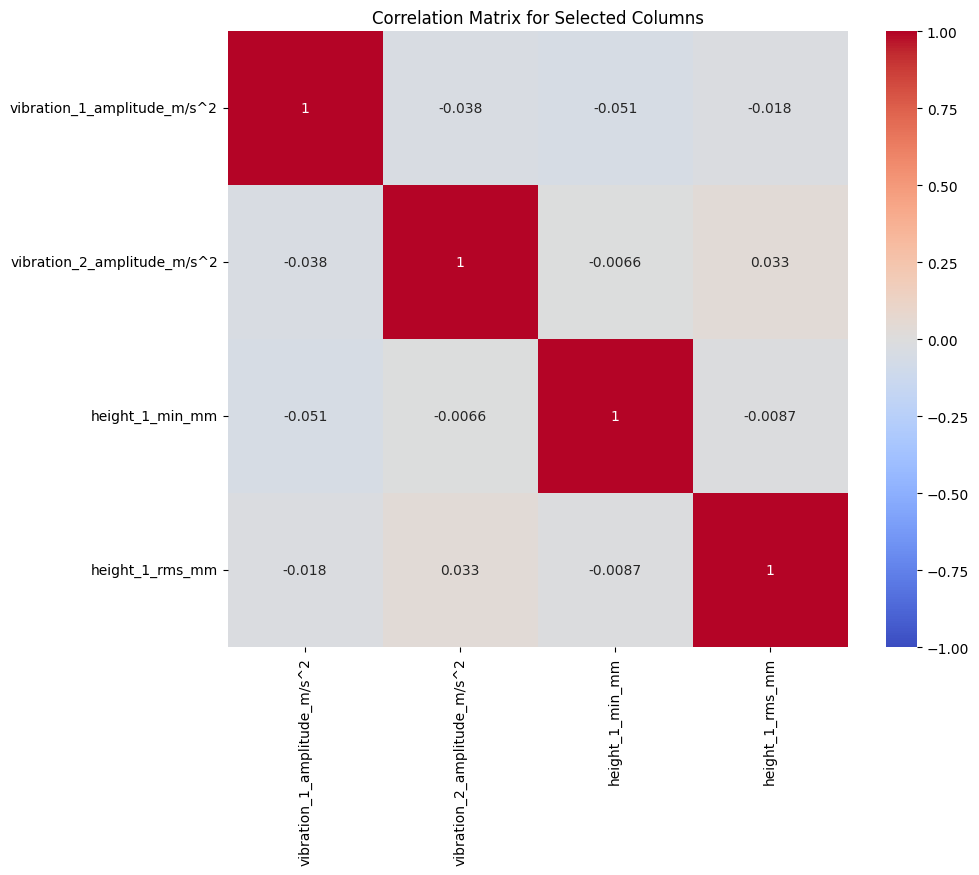

In [23]:
import seaborn as sns

# Calculate the correlation matrix for the selected columns
correlation_matrix = data[cols_of_interest].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Selected Columns')
plt.show()


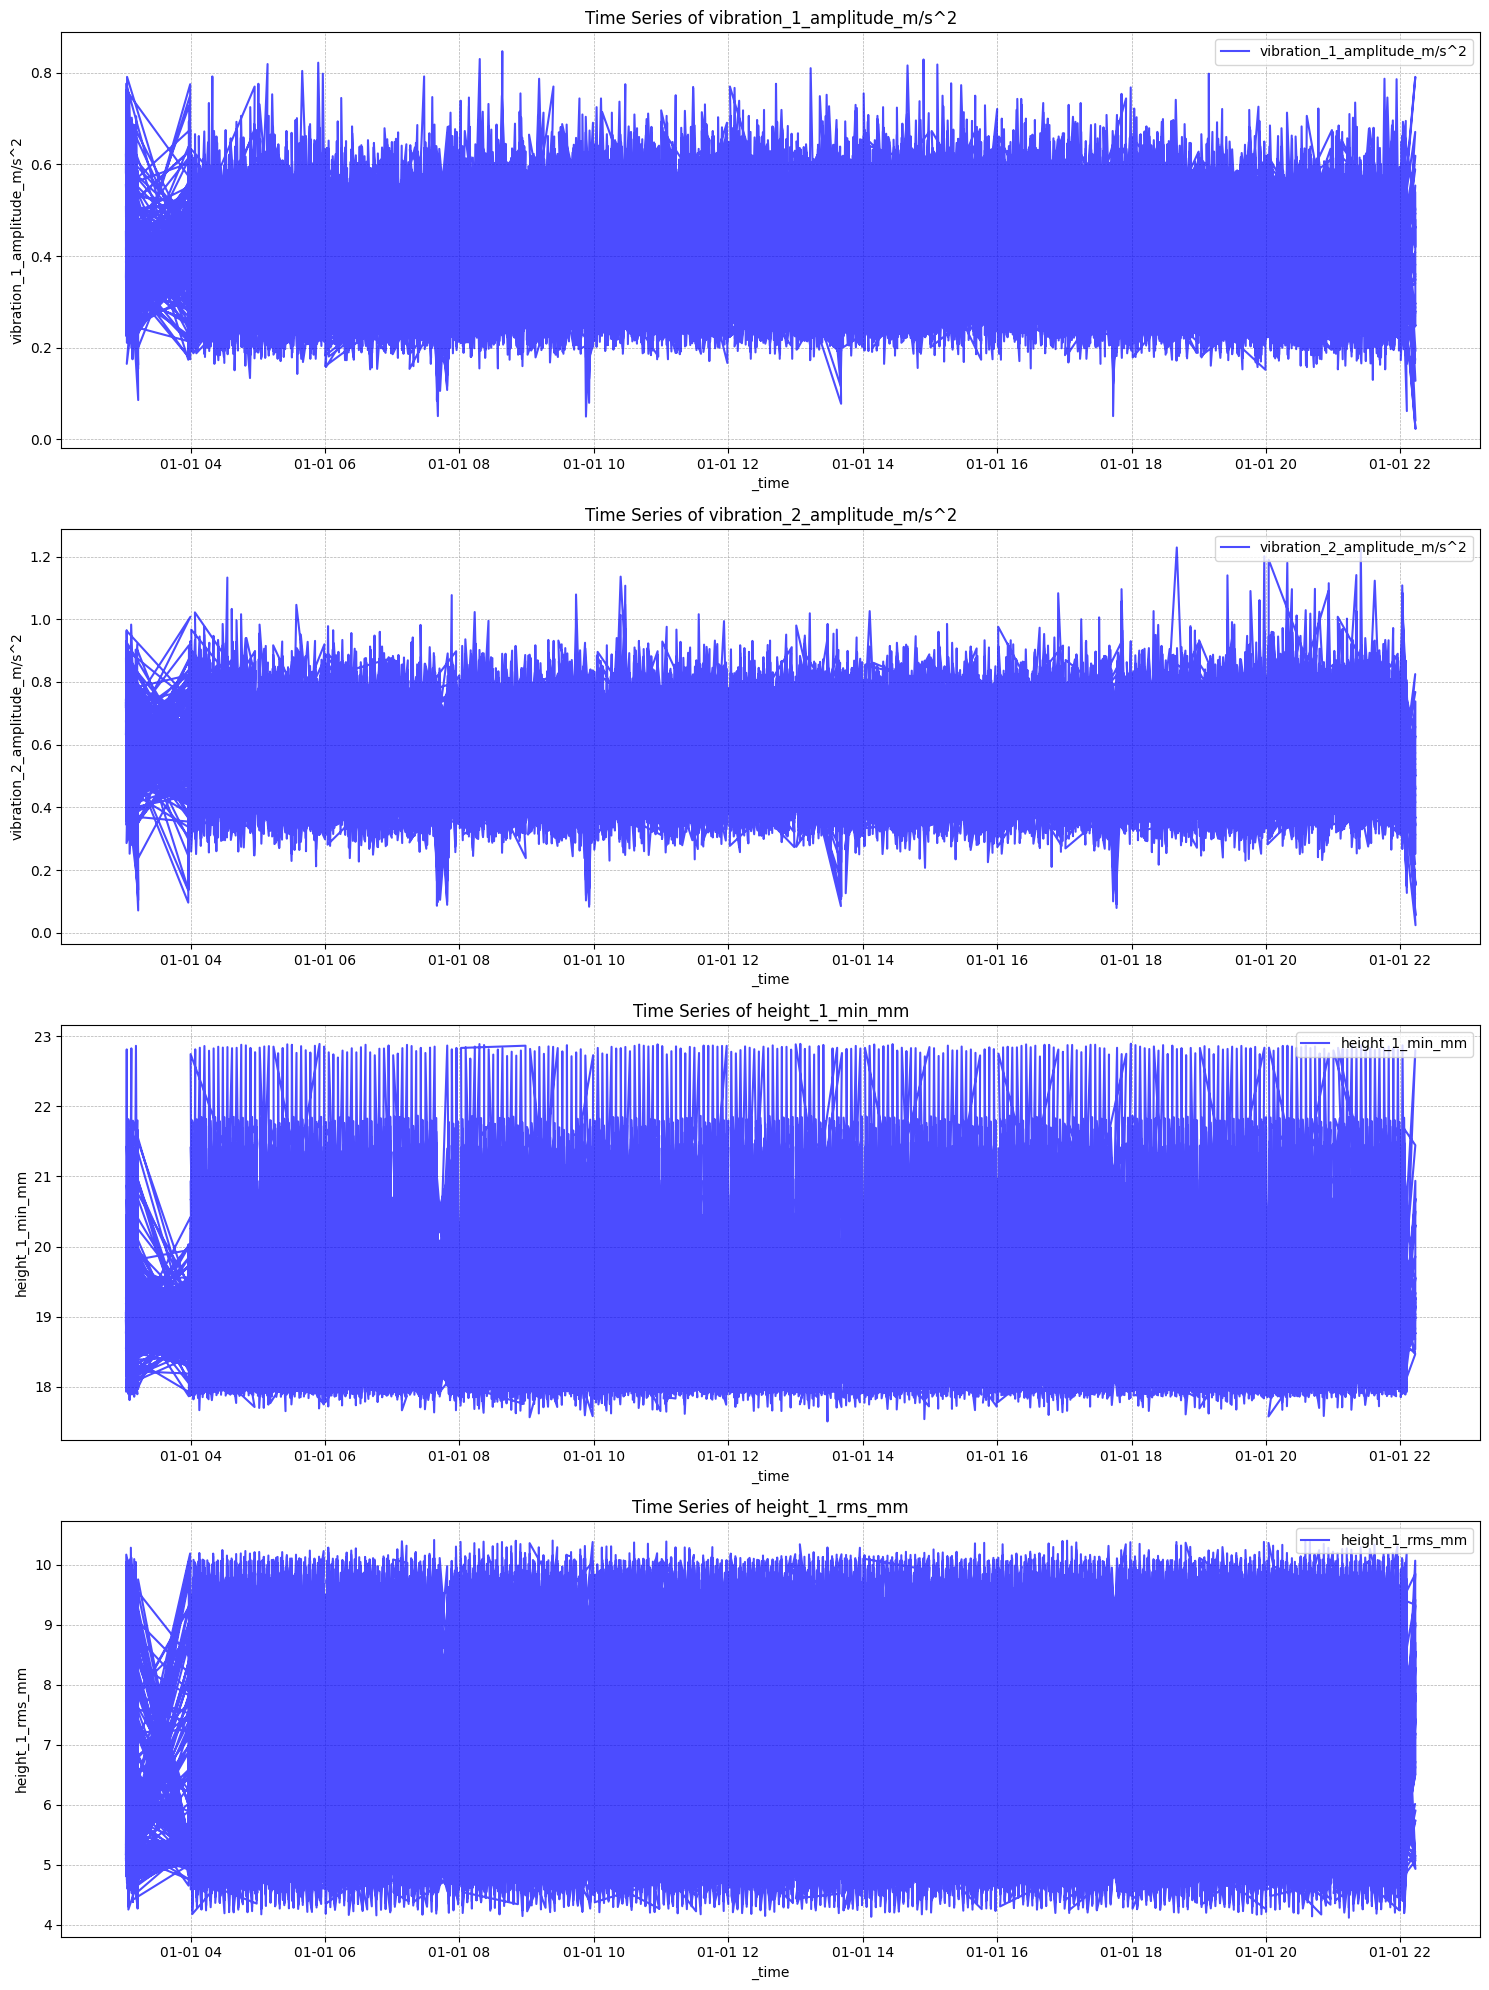

In [24]:
# Time Series Analysis 
time_col = '_time'

# Setting up the figure and axes
fig, axs = plt.subplots(len(cols_of_interest), 1, figsize=(15, 20))

# Looping through columns and plotting time series
for i, col in enumerate(cols_of_interest):
    axs[i].plot(data[time_col], data[col], label=col, color='blue', alpha=0.7)
    axs[i].set_title(f'Time Series of {col}')
    axs[i].set_xlabel(time_col)
    axs[i].set_ylabel(col)
    axs[i].legend(loc='upper right')
    axs[i].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

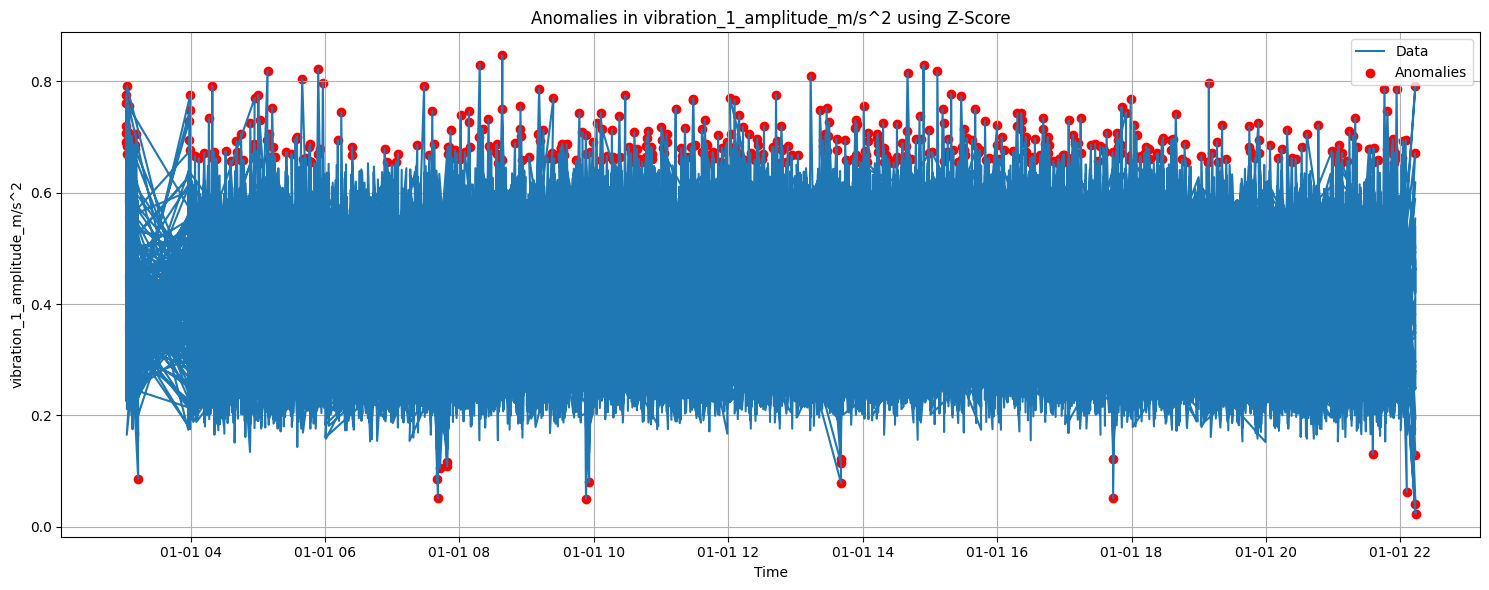

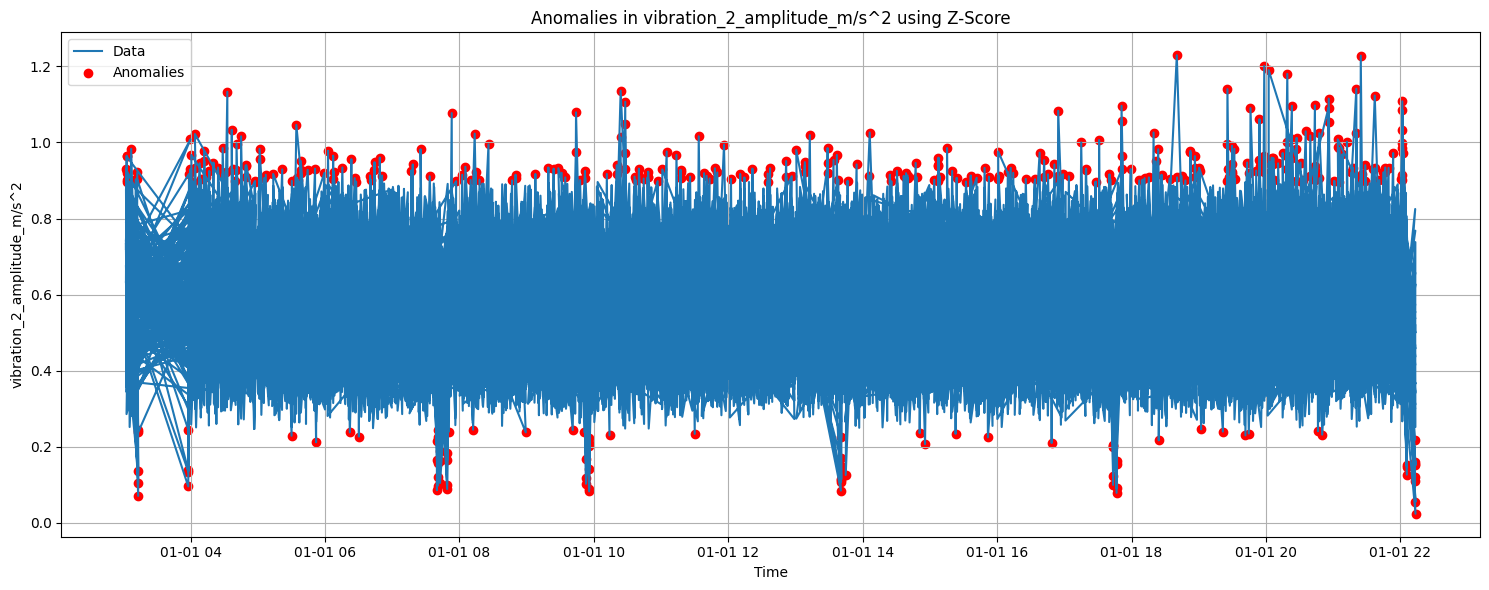

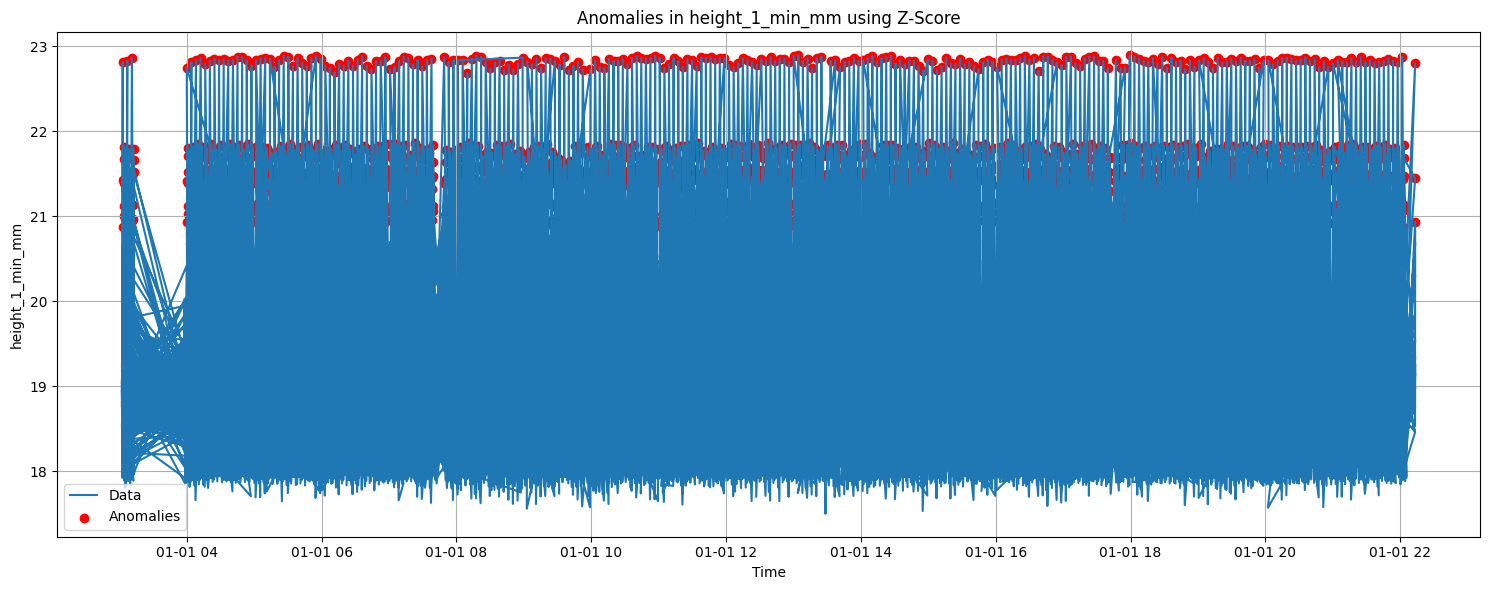

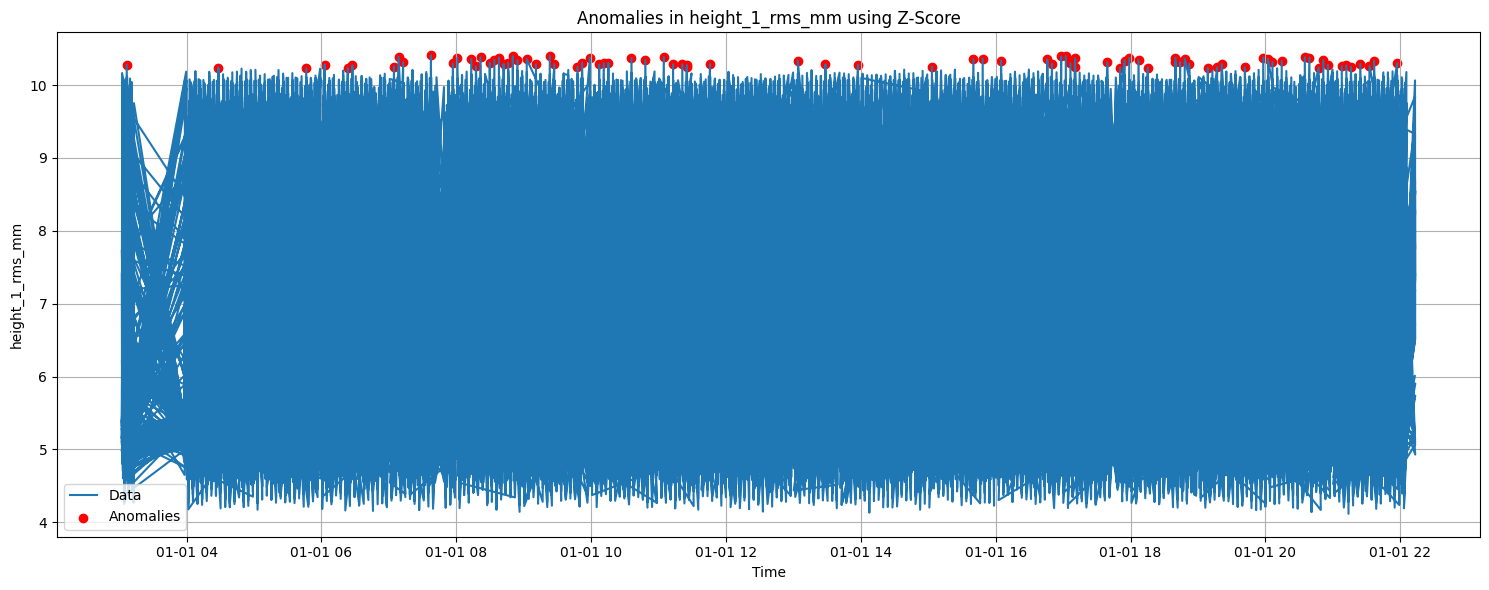

In [25]:
#Anomaly Detection: Z-Score Method

from scipy.stats import zscore

# Calculate the Z-Score for the columns of interest
data_zscore = zscore(data[cols_of_interest])

# Convert to DataFrame for ease of use
df_zscore = pd.DataFrame(data_zscore, columns=cols_of_interest)

# Define threshold for anomalies (Z-Score > 3 or Z-Score < -3)
threshold = 3
anomalies_zscore = (df_zscore > threshold) | (df_zscore < -threshold)

# Visualize anomalies
for col in cols_of_interest:
    plt.figure(figsize=(15, 6))
    plt.plot(data['_time'], data[col], label='Data')
    plt.scatter(data['_time'][anomalies_zscore[col]], data[col][anomalies_zscore[col]], color='red', label='Anomalies')
    plt.title(f'Anomalies in {col} using Z-Score')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


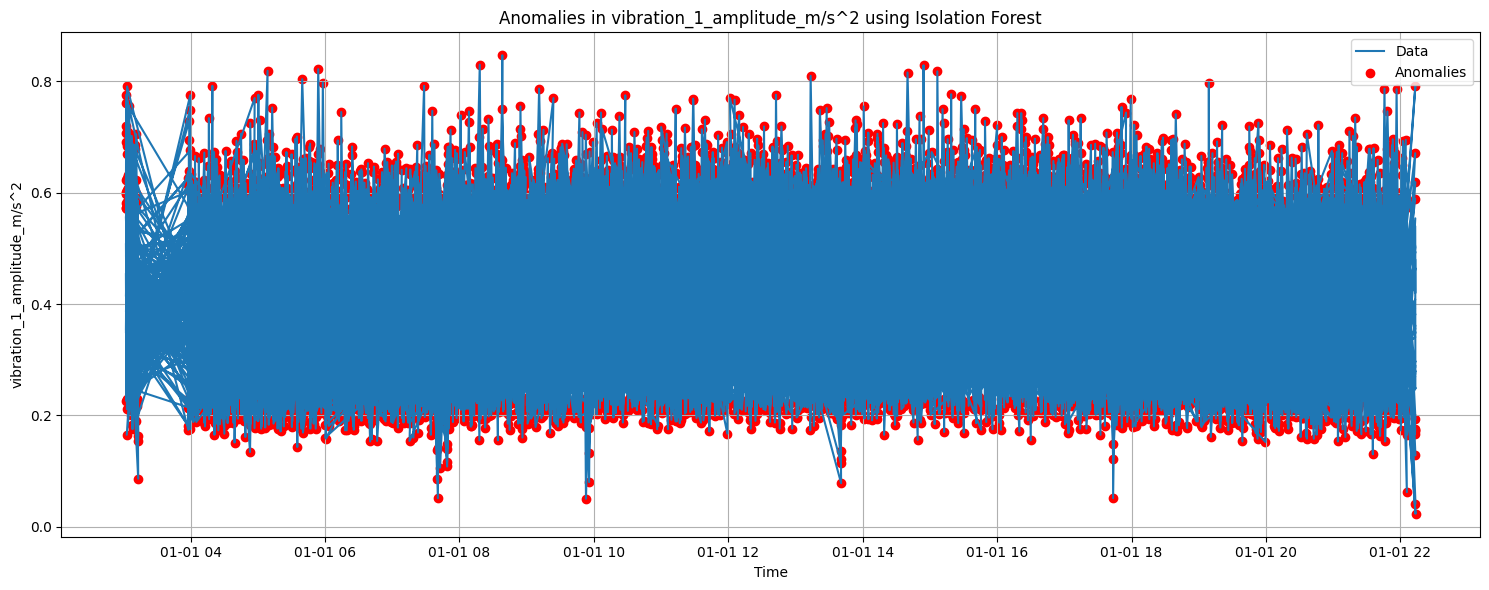

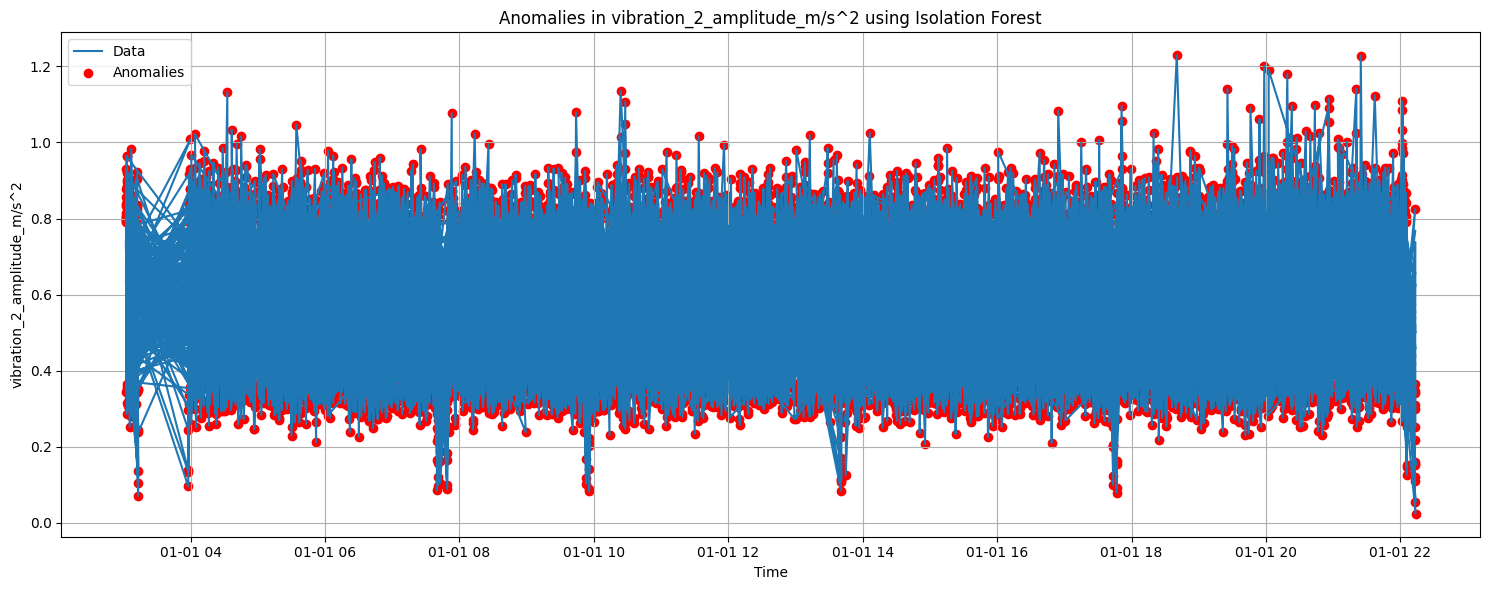

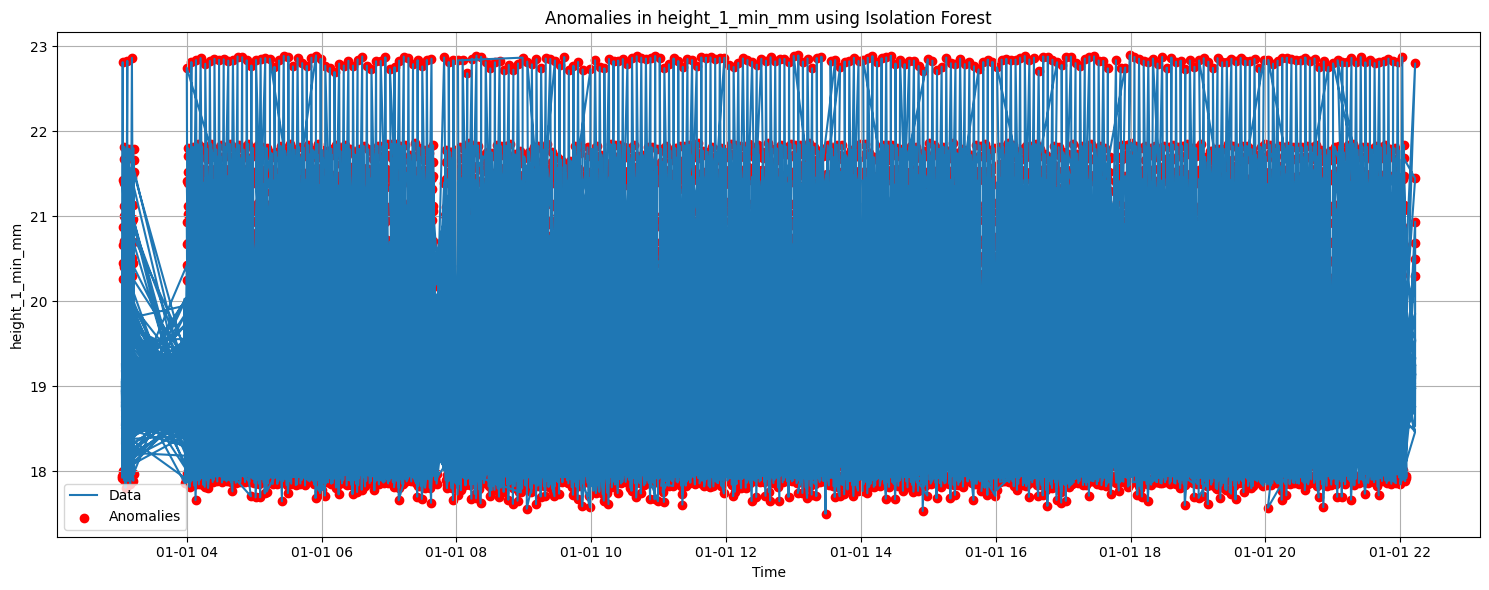

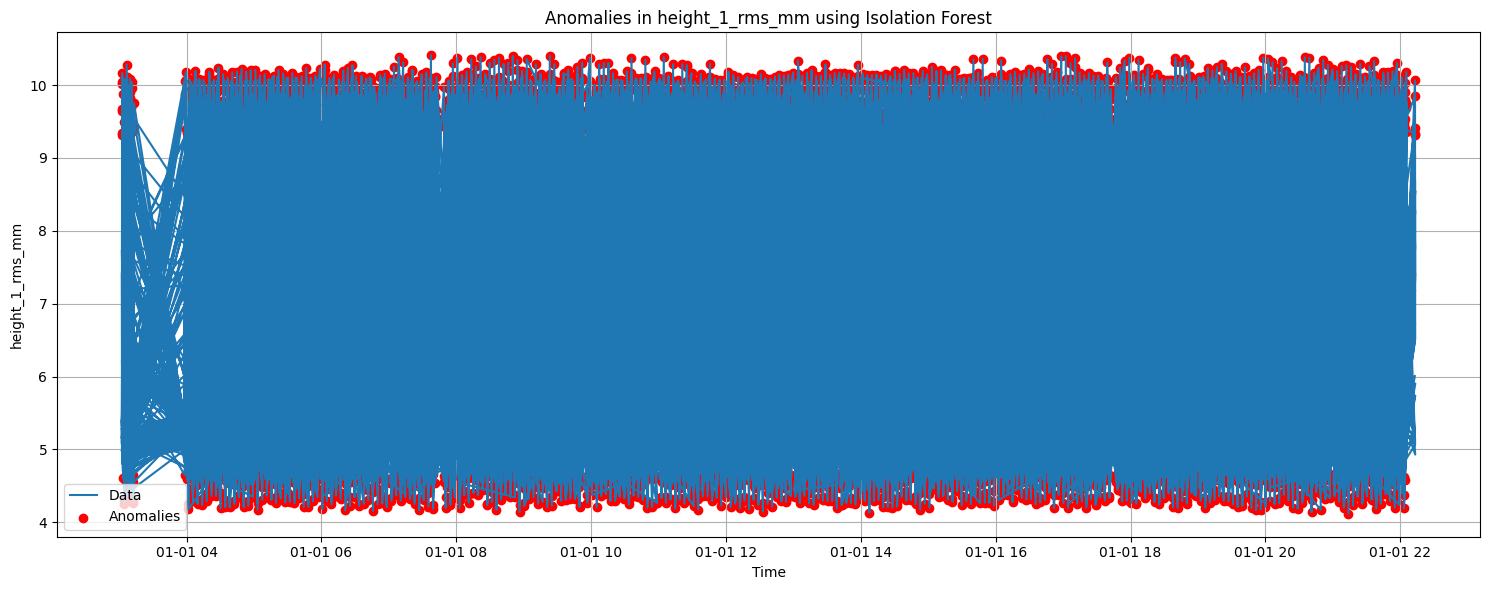

In [26]:
#Isolation Forest

from sklearn.ensemble import IsolationForest

# Initialize the model
iso_forest = IsolationForest(contamination=0.05)  # contamination is the proportion of outliers in the dataset

# Fit the model and predict anomalies
for col in cols_of_interest:
    data[col + '_anomaly'] = iso_forest.fit_predict(data[[col]])

    # Visualize the anomalies
    plt.figure(figsize=(15, 6))
    plt.plot(data['_time'], data[col], label='Data')
    plt.scatter(data['_time'][data[col + '_anomaly'] == -1], data[col][data[col + '_anomaly'] == -1], color='red', label='Anomalies')
    plt.title(f'Anomalies in {col} using Isolation Forest')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


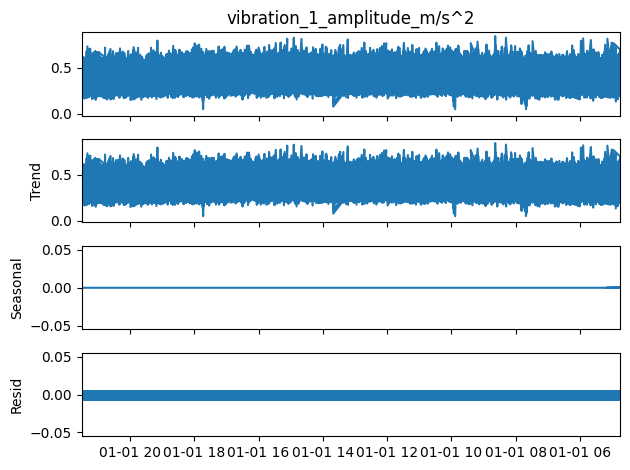

In [27]:
#Time Series Analysis - Decomposition

import statsmodels.api as sm
from matplotlib import pyplot as plt

# Decomposing the 'vibration_1_amplitude_m/s^2' time series
decomposition = sm.tsa.seasonal_decompose(data.set_index('_time')['vibration_1_amplitude_m/s^2'], model='additive', period=1)

# Plotting the decomposition
fig = decomposition.plot()
plt.show()



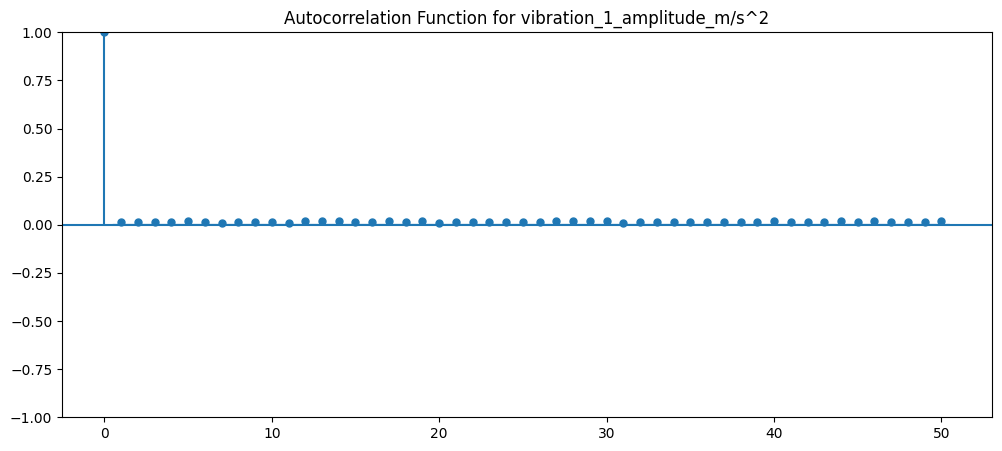

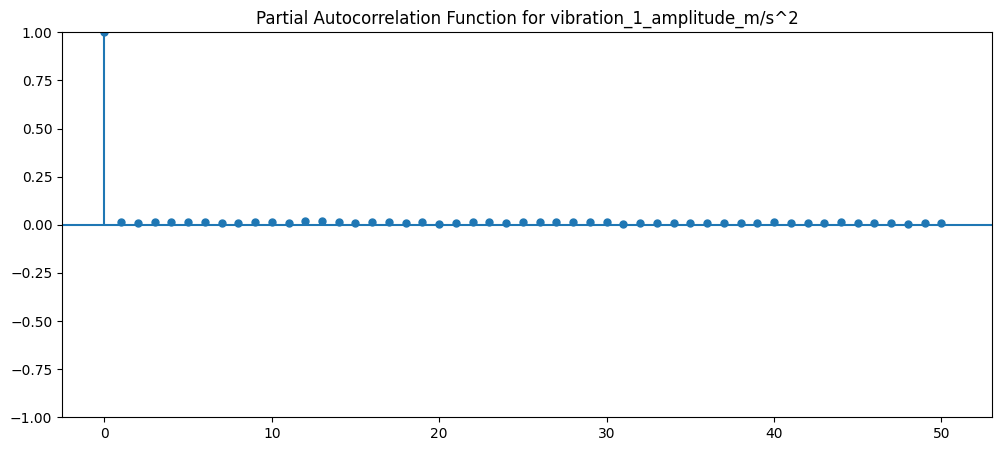

In [28]:
#Autocorrelation:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Selecting the column for analysis
column = 'vibration_1_amplitude_m/s^2'

# Plotting Autocorrelation Function (ACF)
plt.figure(figsize=(12,5))
plot_acf(data[column], lags=50, ax=plt.gca())
plt.title('Autocorrelation Function for {}'.format(column))
plt.show()

# Plotting Partial Autocorrelation Function (PACF)
plt.figure(figsize=(12,5))
plot_pacf(data[column], lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function for {}'.format(column))
plt.show()


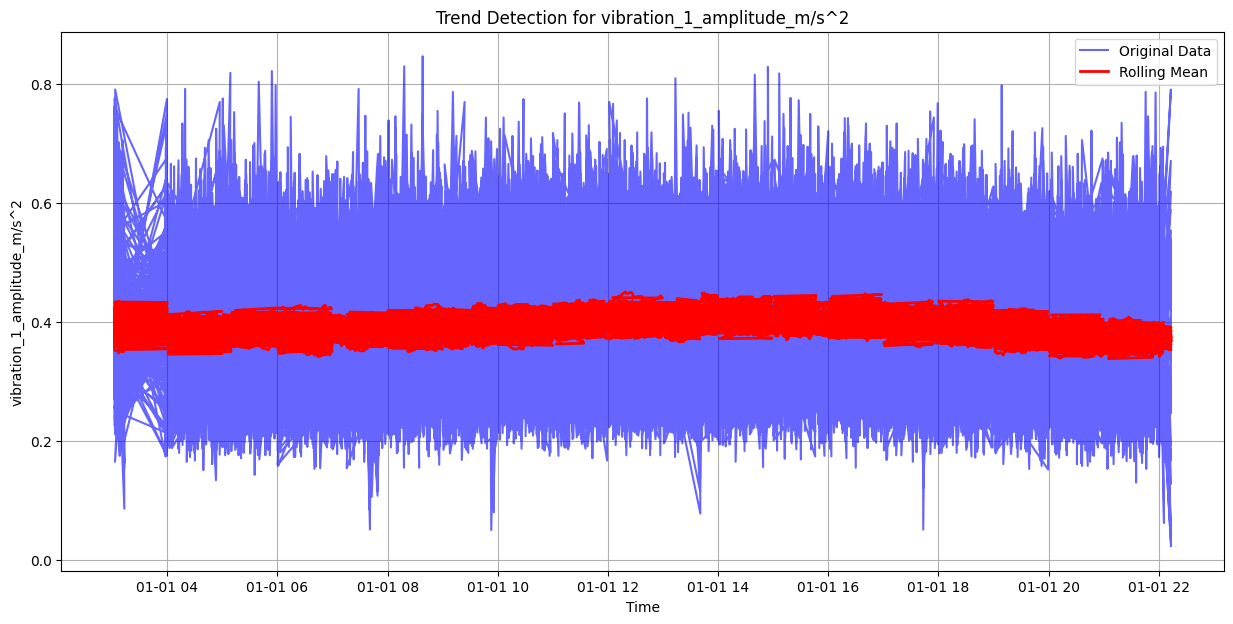

In [29]:
#Trend Detection

# Setting the column for analysis
column = 'vibration_1_amplitude_m/s^2'

# Calculate the rolling mean (moving average) with a window size of, say, 50
rolling_mean = data[column].rolling(window=50).mean()

plt.figure(figsize=(15,7))
plt.plot(data['_time'], data[column], label='Original Data', color='blue', alpha=0.6)
plt.plot(data['_time'], rolling_mean, label='Rolling Mean', color='red', linewidth=2)
plt.title(f'Trend Detection for {column}')
plt.xlabel('Time')
plt.ylabel(column)
plt.legend()
plt.grid(True)
plt.show()


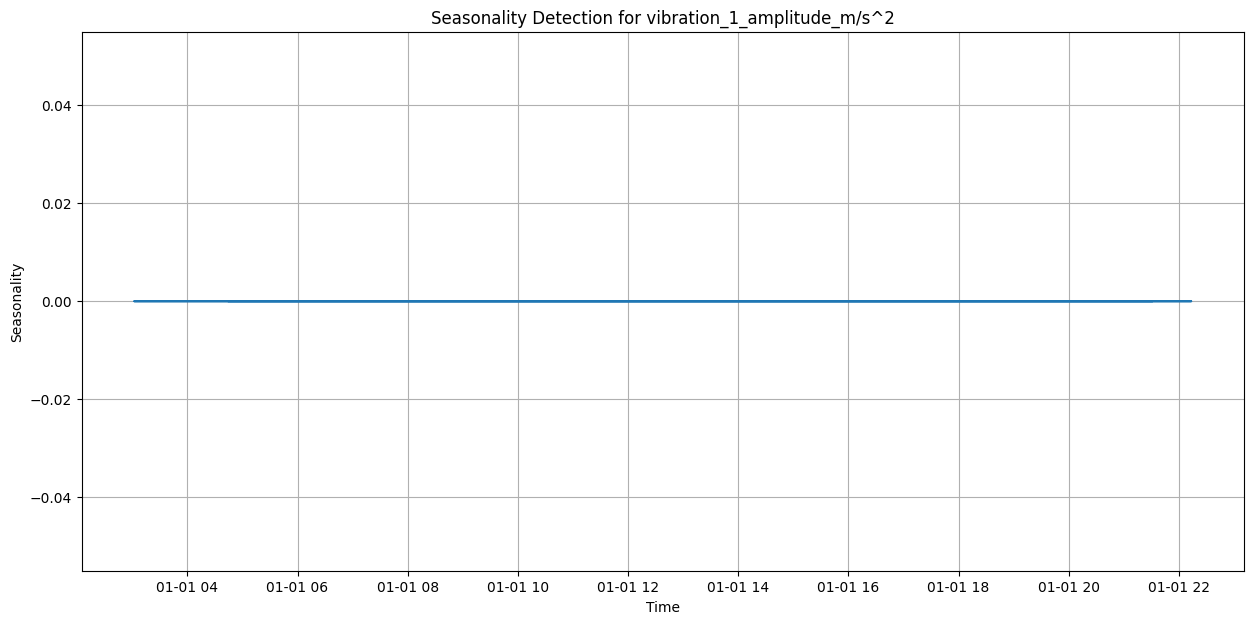

In [30]:
#Seasonality Detection:

plt.figure(figsize=(15,7))
plt.plot(data['_time'], decomposition.seasonal)
plt.title(f'Seasonality Detection for {column}')
plt.xlabel('Time')
plt.ylabel('Seasonality')
plt.grid(True)
plt.show()


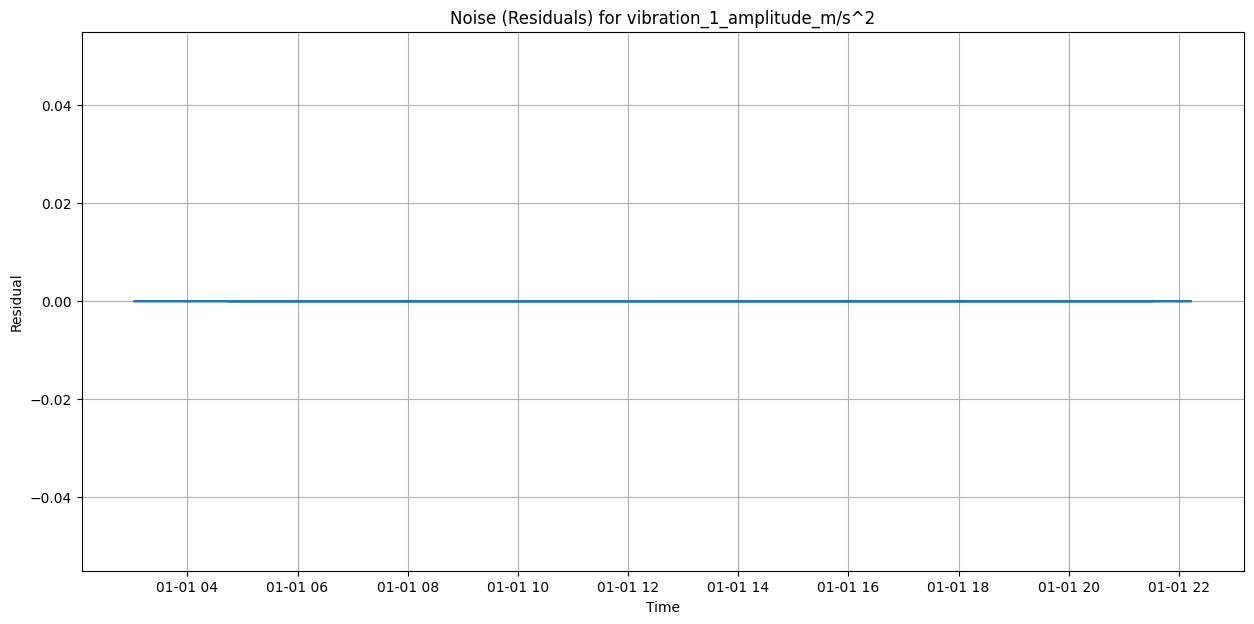

In [31]:
#Noise Detection

plt.figure(figsize=(15,7))
plt.plot(data['_time'], decomposition.resid)
plt.title(f'Noise (Residuals) for {column}')
plt.xlabel('Time')
plt.ylabel('Residual')
plt.grid(True)
plt.show()


<Figure size 1500x700 with 0 Axes>

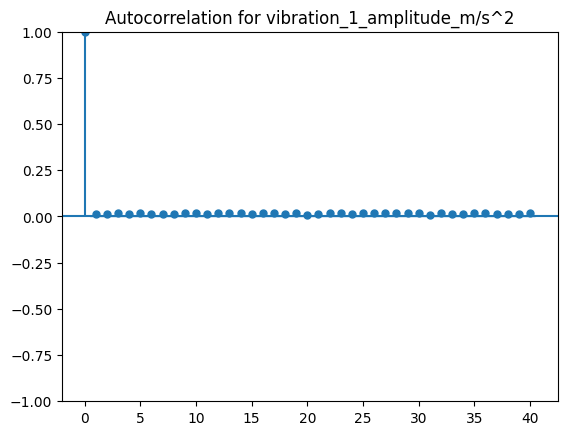

<Figure size 1500x700 with 0 Axes>

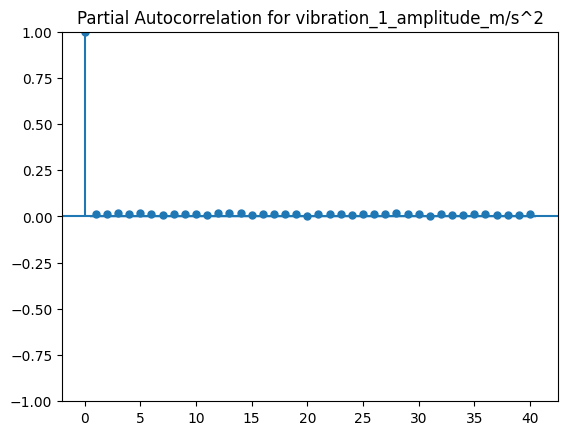

In [32]:
#Autocorrelation

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

column = 'vibration_1_amplitude_m/s^2'

# Plotting the autocorrelation function (ACF)
plt.figure(figsize=(15,7))
plot_acf(data[column], lags=40)
plt.title(f'Autocorrelation for {column}')
plt.show()

# Plotting the partial autocorrelation function (PACF)
plt.figure(figsize=(15,7))
plot_pacf(data[column], lags=40)
plt.title(f'Partial Autocorrelation for {column}')
plt.show()


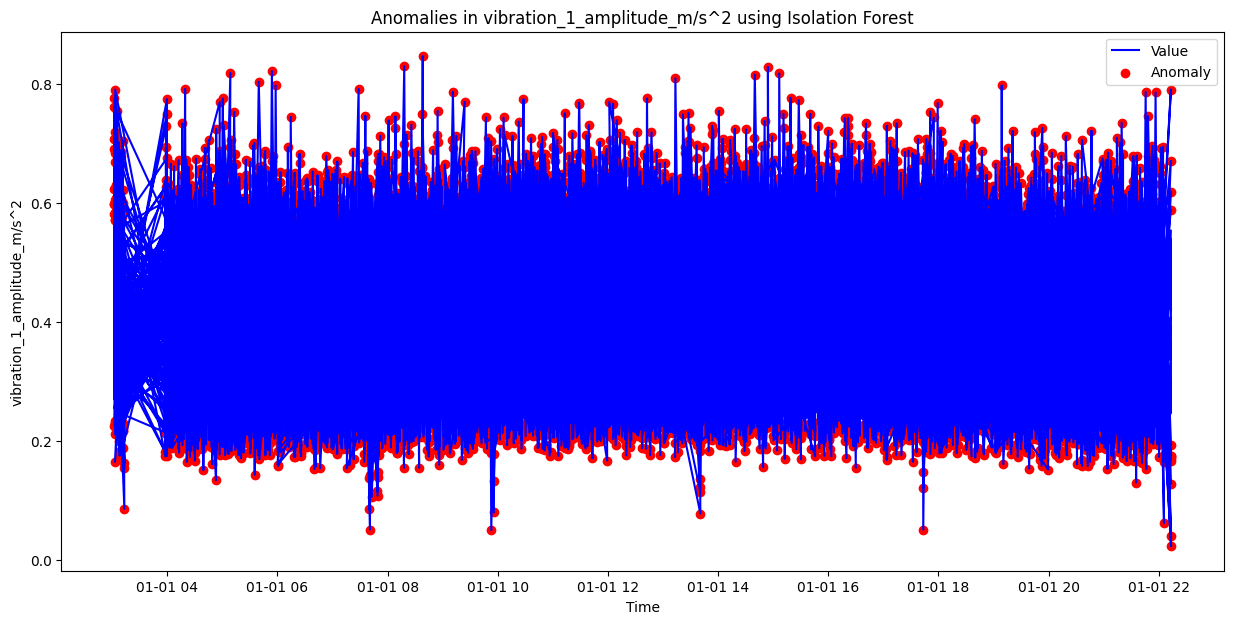

In [33]:
#Anomaly Detection using Isolation Forest

from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05)  # contamination is the proportion of outliers in the dataset

# Using the model to predict anomalies
column = 'vibration_1_amplitude_m/s^2'
data['anomaly'] = iso_forest.fit_predict(data[[column]])

# Visualize the data and anomalies
plt.figure(figsize=(15, 7))
plt.plot(data['_time'], data[column], label='Value', color='blue')
plt.scatter(data['_time'][data['anomaly'] == -1], data[column][data['anomaly'] == -1], color='red', label='Anomaly')
plt.title(f'Anomalies in {column} using Isolation Forest')
plt.xlabel('Time')
plt.ylabel(column)
plt.legend()
plt.show()

# Drop the 'anomaly' column to clean up our dataset
data.drop('anomaly', axis=1, inplace=True)


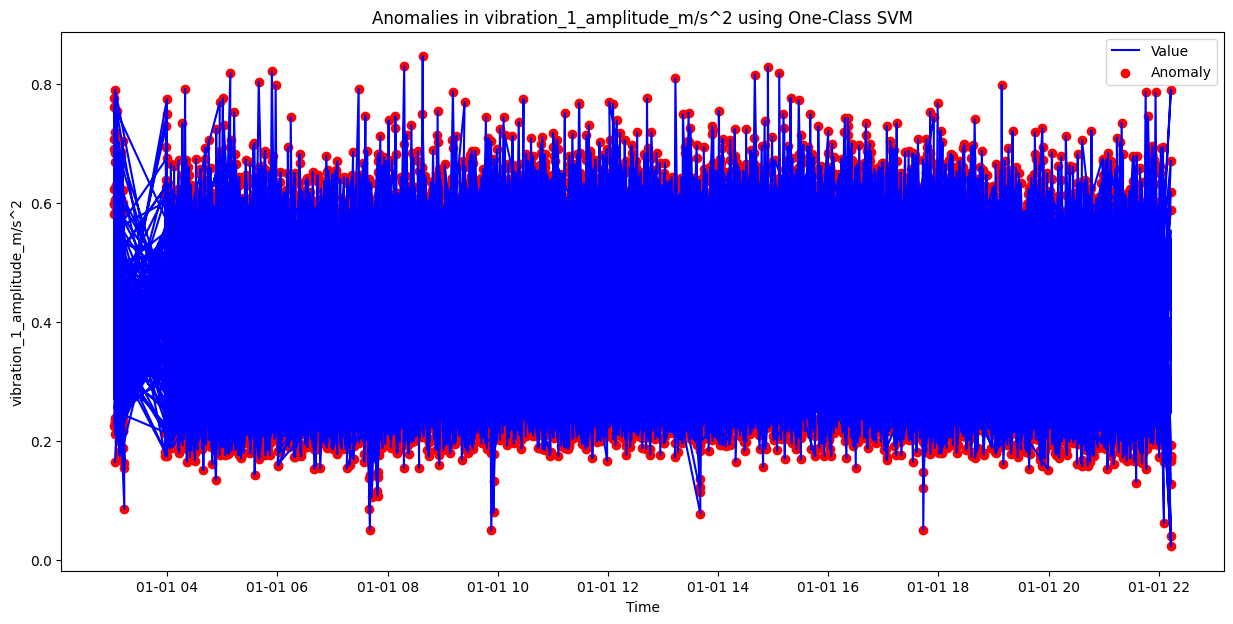

In [34]:
#Anomaly Detection using One-Class SVM

from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM

# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['vibration_1_amplitude_m/s^2']])

# Initialize the One-Class SVM model
one_class_svm = OneClassSVM(nu=0.05, kernel="rbf", gamma=0.01)  # nu is an upper bound on the fraction of margin errors

# Fit the model and predict anomalies
data['anomaly_svm'] = one_class_svm.fit_predict(data_scaled)

# Visualize the data and anomalies detected by SVM
plt.figure(figsize=(15, 7))
plt.plot(data['_time'], data['vibration_1_amplitude_m/s^2'], label='Value', color='blue')
plt.scatter(data['_time'][data['anomaly_svm'] == -1], data['vibration_1_amplitude_m/s^2'][data['anomaly_svm'] == -1], color='red', label='Anomaly')
plt.title('Anomalies in vibration_1_amplitude_m/s^2 using One-Class SVM')
plt.xlabel('Time')
plt.ylabel('vibration_1_amplitude_m/s^2')
plt.legend()
plt.show()

# Drop the 'anomaly_svm' column to clean up our dataset
data.drop('anomaly_svm', axis=1, inplace=True)


                                    SARIMAX Results                                    
Dep. Variable:     vibration_1_amplitude_m/s^2   No. Observations:               108296
Model:                          ARIMA(5, 1, 0)   Log Likelihood              103128.967
Date:                         Thu, 14 Sep 2023   AIC                        -206245.934
Time:                                 18:38:04   BIC                        -206188.378
Sample:                                      0   HQIC                       -206228.530
                                      - 108296                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8368      0.003   -281.183      0.000      -0.843      -0.831
ar.L2         -0.6727      0.004   -177.092      0.000     

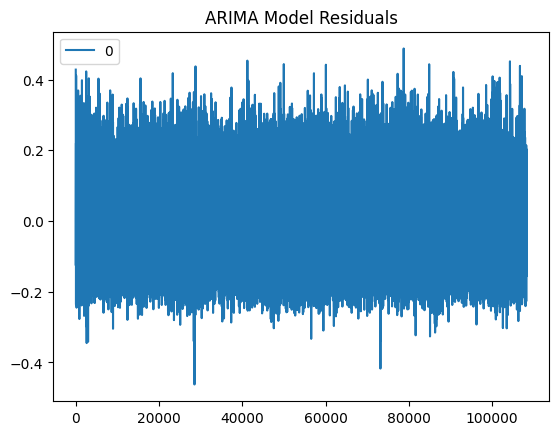

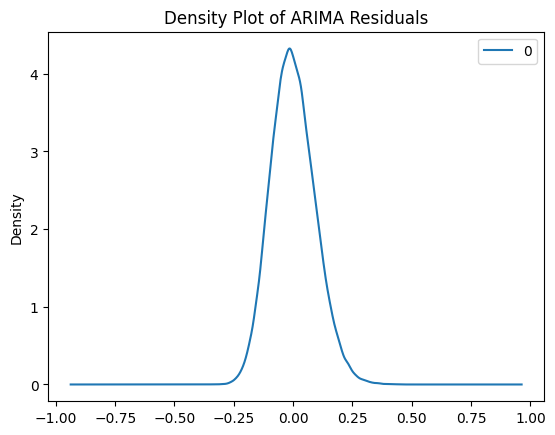

                   0
count  108296.000000
mean        0.000005
std         0.093374
min        -0.462382
25%        -0.065056
50%        -0.004855
75%         0.060299
max         0.487763


In [36]:
#Time Series Forecasting
#ARIMA (AutoRegressive Integrated Moving Average)


from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
# The order (p,d,q) needs to be determined based on your dataset and prior analysis.
# For the sake of this example, I'm using (5,1,0), but you should adjust these parameters accordingly.
p, d, q = 5, 1, 0
model = ARIMA(data['vibration_1_amplitude_m/s^2'], order=(p,d,q))

# Fit the ARIMA model
model_fit = model.fit()

# Summary of the ARIMA model
print(model_fit.summary())

# Plot the residuals to ensure there are no patterns
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title="ARIMA Model Residuals")
plt.show()

# Density plot of the residuals
residuals.plot(kind='kde', title="Density Plot of ARIMA Residuals")
plt.show()

# Display the residual details
print(residuals.describe())




print(type(forecast_result))
print(forecast_result)



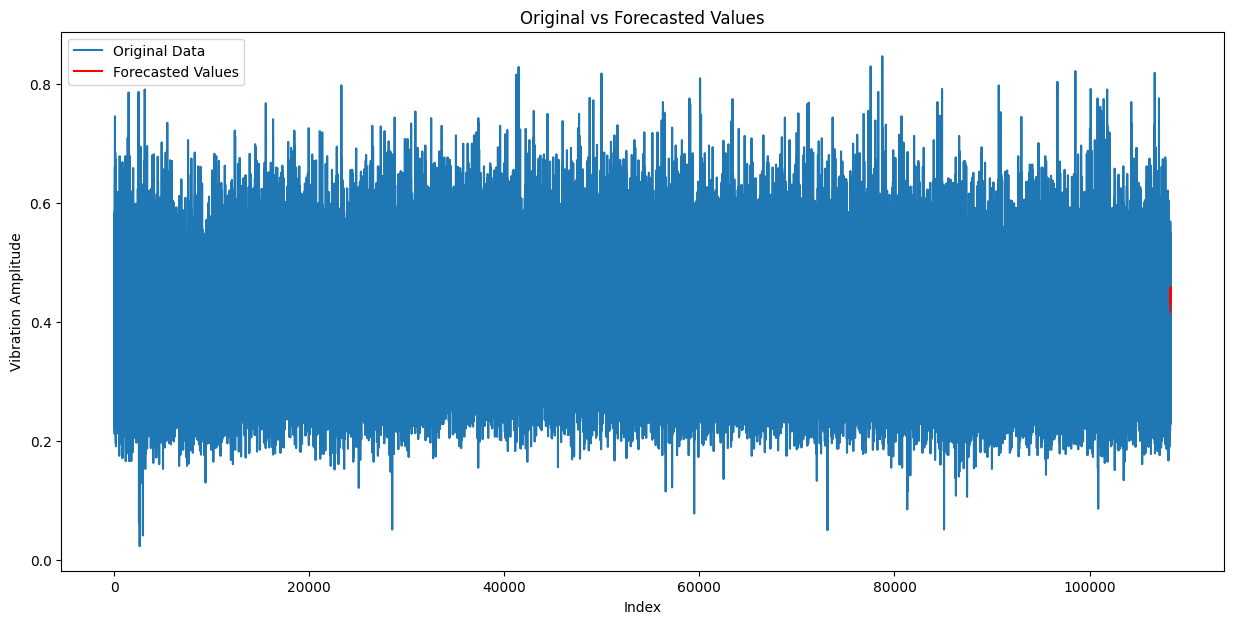

In [38]:
# Plotting original data and forecasted values
# Generate forecasts. Adjust n_steps as needed.
n_steps = 50  # for example, forecasting the next 50 time periods
forecast_result = model_fit.forecast(steps=n_steps)

# Plotting original data and forecasted values
plt.figure(figsize=(15,7))
plt.plot(data.index, data['vibration_1_amplitude_m/s^2'], label='Original Data')
plt.plot(forecast_result.index, forecast_result, color='red', label='Forecasted Values')
plt.legend()
plt.title('Original vs Forecasted Values')
plt.xlabel('Index')
plt.ylabel('Vibration Amplitude')
plt.show()



Processed 0 out of 21660
Processed 100 out of 21660
Processed 200 out of 21660
Processed 300 out of 21660
Processed 400 out of 21660
Processed 500 out of 21660
Processed 600 out of 21660
Processed 700 out of 21660
Processed 800 out of 21660
Processed 900 out of 21660
Processed 1000 out of 21660
Processed 1100 out of 21660
Processed 1200 out of 21660
Processed 1300 out of 21660
Processed 1400 out of 21660
Processed 1500 out of 21660
Processed 1600 out of 21660
Processed 1700 out of 21660
Processed 1800 out of 21660
Processed 1900 out of 21660
Processed 2000 out of 21660
Processed 2100 out of 21660
Processed 2200 out of 21660
Processed 2300 out of 21660
Processed 2400 out of 21660
Processed 2500 out of 21660
Processed 2600 out of 21660
Processed 2700 out of 21660
Processed 2800 out of 21660
Processed 2900 out of 21660
Processed 3000 out of 21660
Processed 3100 out of 21660
Processed 3200 out of 21660
Processed 3300 out of 21660
Processed 3400 out of 21660
Processed 3500 out of 21660
Proc

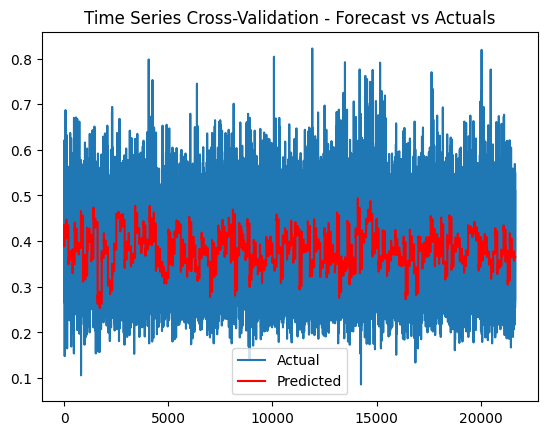

In [40]:
#Time Series Cross-Validation

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

# Splitting the data into training and testing
train_size = int(len(data['vibration_1_amplitude_m/s^2']) * 0.8)
train, test = data['vibration_1_amplitude_m/s^2'][:train_size], data['vibration_1_amplitude_m/s^2'][train_size:]

history = [x for x in train]
predictions = list()

# Define step size
step_size = 100

# Time Series Cross-Validation with increased step size
for t in range(0, len(test), step_size):
    # Fit the model
    model = SARIMAX(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    
    # Forecast 'step_size' steps ahead
    yhats = model_fit.forecast(steps=step_size)
    
    # Store forecast and observation
    predictions.extend(yhats[:min(step_size, len(test) - t)])  # Ensure we don't exceed the test set size
    history.extend(test.iloc[t:t+step_size])
    
    # Print progress
    print(f"Processed {t} out of {len(test)}")

# Evaluate forecasts
rmse = sqrt(mean_squared_error(test[:len(predictions)], predictions))
print(f"Test RMSE: {rmse:.3f}")

# Plot forecasts against actual outcomes
plt.plot(test.values)
plt.plot(predictions, color='red')
plt.legend(['Actual', 'Predicted'])
plt.title('Time Series Cross-Validation - Forecast vs Actuals')
plt.show()



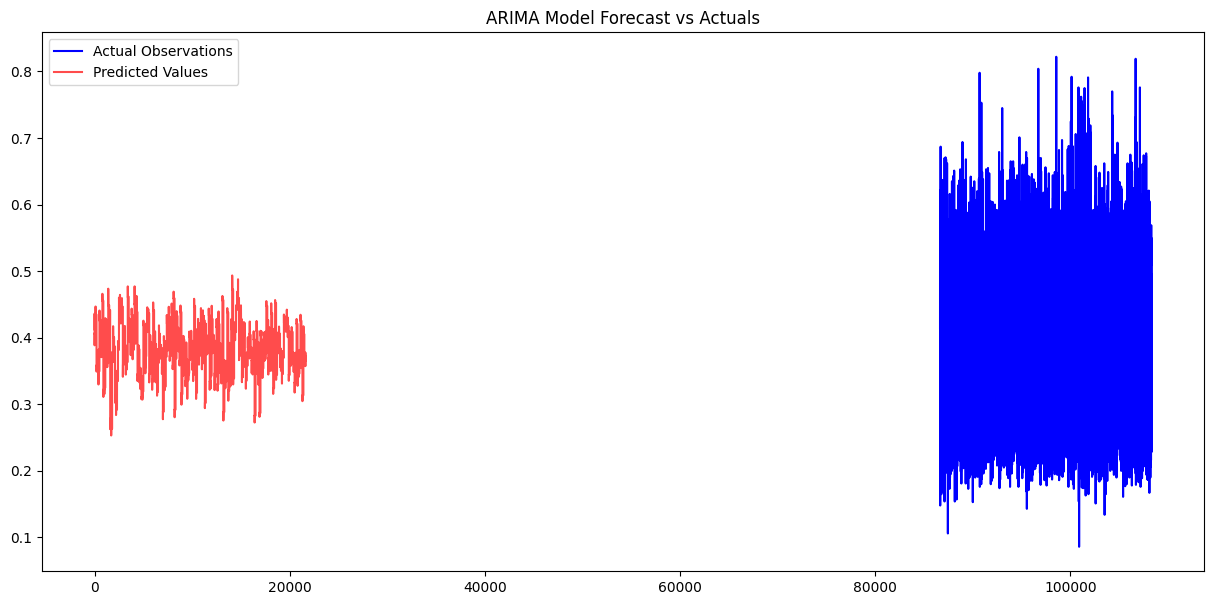

Mean Absolute Error (MAE): 0.08
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.10


In [41]:
#Comparative Performance Analysis

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Plotting actual vs predicted values
plt.figure(figsize=(15,7))
plt.plot(test, color='blue', label='Actual Observations')
plt.plot(predictions, color='red', alpha=0.7, label='Predicted Values')
plt.title('ARIMA Model Forecast vs Actuals')
plt.legend(loc='upper left')
plt.show()

# Calculate and print performance metrics
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


In [44]:
#Time Series Cross-Validation

from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import mean_squared_error

# Initialize TimeSeriesSplit with 5 splits
tscv = TimeSeriesSplit(n_splits=5)

# Define the time series data
X = data['vibration_1_amplitude_m/s^2'].values

# Iterate through each train/test split and train the model
for train_idx, test_idx in tscv.split(X):
    train, test = X[train_idx], X[test_idx]
    
    # Train the ARIMA model on the training data
    model = ARIMA(train, order=(5,1,0))
    model_fit = model.fit()
    
    # Make predictions for the test data
    predictions = model_fit.forecast(steps=len(test))
    
    # Calculate and print the RMSE for this split
    rmse = np.sqrt(mean_squared_error(test, predictions))
    print(f"RMSE for this split: {rmse:.2f}")





RMSE for this split: 0.09
RMSE for this split: 0.09
RMSE for this split: 0.09
RMSE for this split: 0.09
RMSE for this split: 0.15


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


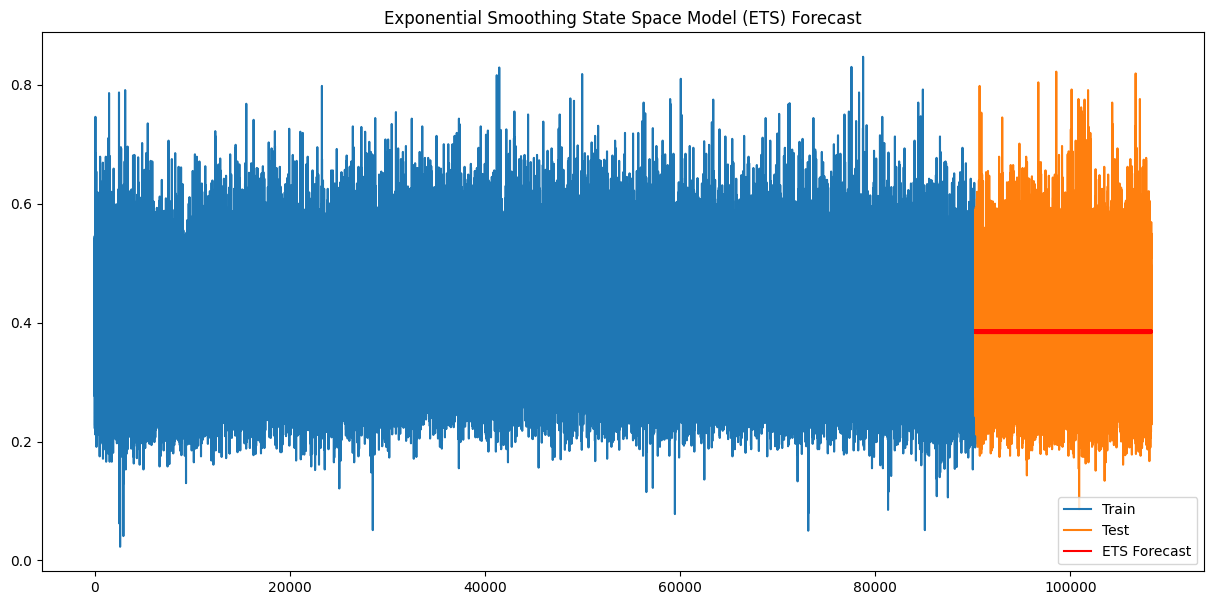

In [48]:
# ETS Model
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Initialize a scaler
scaler = MinMaxScaler()

# Reshape data for scaling
train_scaled = scaler.fit_transform(train.reshape(-1, 1))
test_scaled = scaler.transform(test.reshape(-1, 1))

# Convert back to series for easier handling
train_series_scaled = pd.Series(train_scaled.flatten(), index=range(len(train)))
test_series_scaled = pd.Series(test_scaled.flatten(), index=range(len(train), len(train) + len(test)))

# Apply ETS on normalized data
model = ExponentialSmoothing(train_series_scaled, trend="add", seasonal="add", seasonal_periods=12, damped_trend=True)
fit = model.fit()

# Forecasting
forecast_scaled = fit.forecast(steps=len(test_series_scaled))

# Convert forecast back to original scale
forecast = scaler.inverse_transform(forecast_scaled.values.reshape(-1, 1)).flatten()

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(range(len(train)), train, label='Train')
plt.plot(range(len(train), len(train) + len(test)), test, label='Test')
plt.plot(range(len(train), len(train) + len(test)), forecast, label='ETS Forecast', color='red')
plt.legend(loc='best')
plt.title('Exponential Smoothing State Space Model (ETS) Forecast')
plt.show()




/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


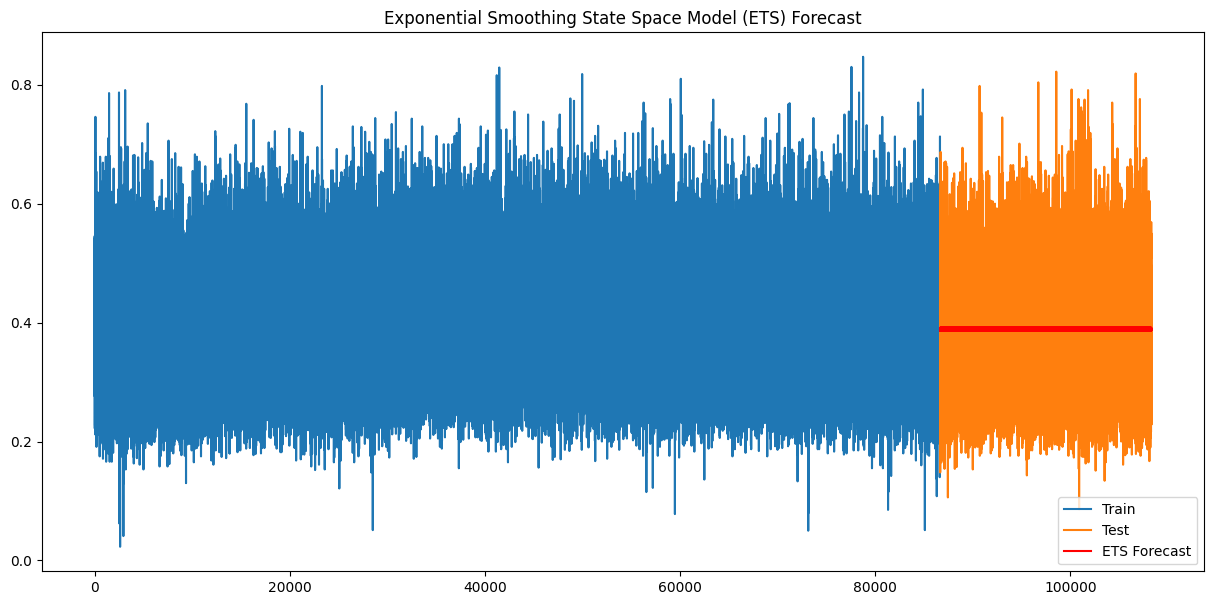

In [49]:
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data['vibration_1_amplitude_m/s^2'][:train_size], data['vibration_1_amplitude_m/s^2'][train_size:]

# Scaling the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train.values.reshape(-1, 1))
test_scaled = scaler.transform(test.values.reshape(-1, 1))

# Convert back to series for easier handling
train_series_scaled = pd.Series(train_scaled.flatten(), index=train.index)
test_series_scaled = pd.Series(test_scaled.flatten(), index=test.index)

# Apply ETS on normalized data
model = ExponentialSmoothing(train_series_scaled, trend="add", seasonal="add", seasonal_periods=12, damped_trend=True)
fit = model.fit()

# Forecasting
forecast_scaled = fit.forecast(steps=len(test_series_scaled))

# Convert forecast back to original scale
forecast = scaler.inverse_transform(forecast_scaled.values.reshape(-1, 1)).flatten()

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='ETS Forecast', color='red')
plt.legend(loc='best')
plt.title('Exponential Smoothing State Space Model (ETS) Forecast')
plt.show()


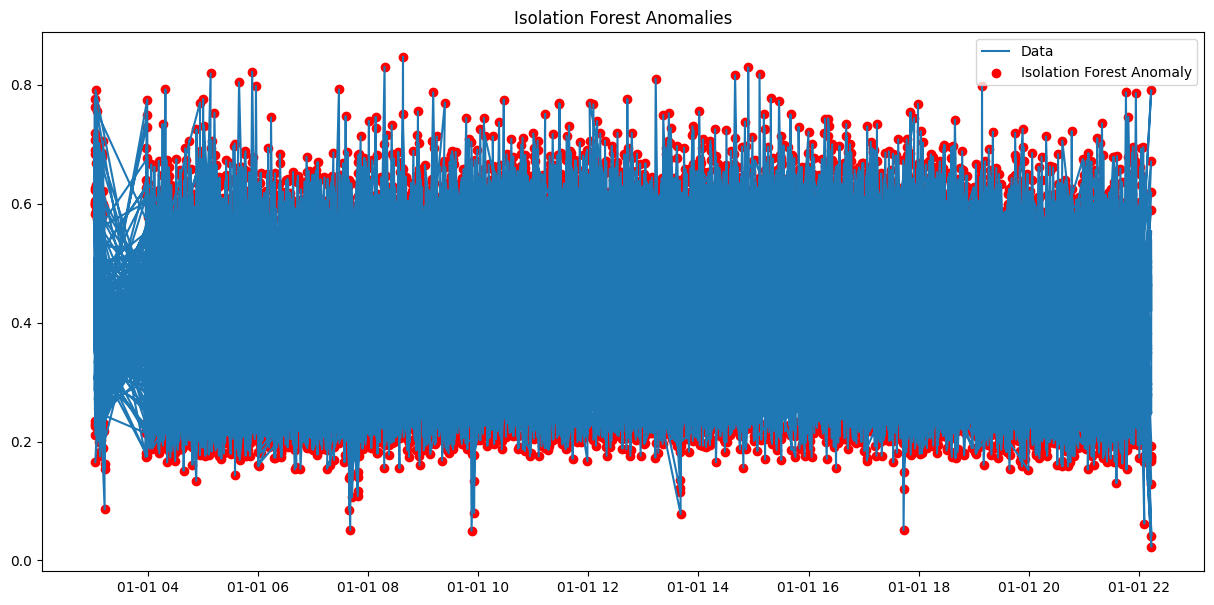

In [50]:
#Unsupervised Anomaly Detection
#Isolation Forest:

from sklearn.ensemble import IsolationForest

# Fit the model
iso_forest = IsolationForest(contamination=0.05)  # contamination is the proportion of outliers in the data
iso_f_outliers = iso_forest.fit_predict(data[['vibration_1_amplitude_m/s^2']])

# Mark outliers in the data
data['iso_forest_outlier'] = iso_f_outliers

# Plotting
plt.figure(figsize=(15,7))
plt.plot(data['_time'], data['vibration_1_amplitude_m/s^2'], label='Data')
plt.scatter(data['_time'][data['iso_forest_outlier'] == -1], data['vibration_1_amplitude_m/s^2'][data['iso_forest_outlier'] == -1], color='red', label='Isolation Forest Anomaly')
plt.legend()
plt.title('Isolation Forest Anomalies')
plt.show()


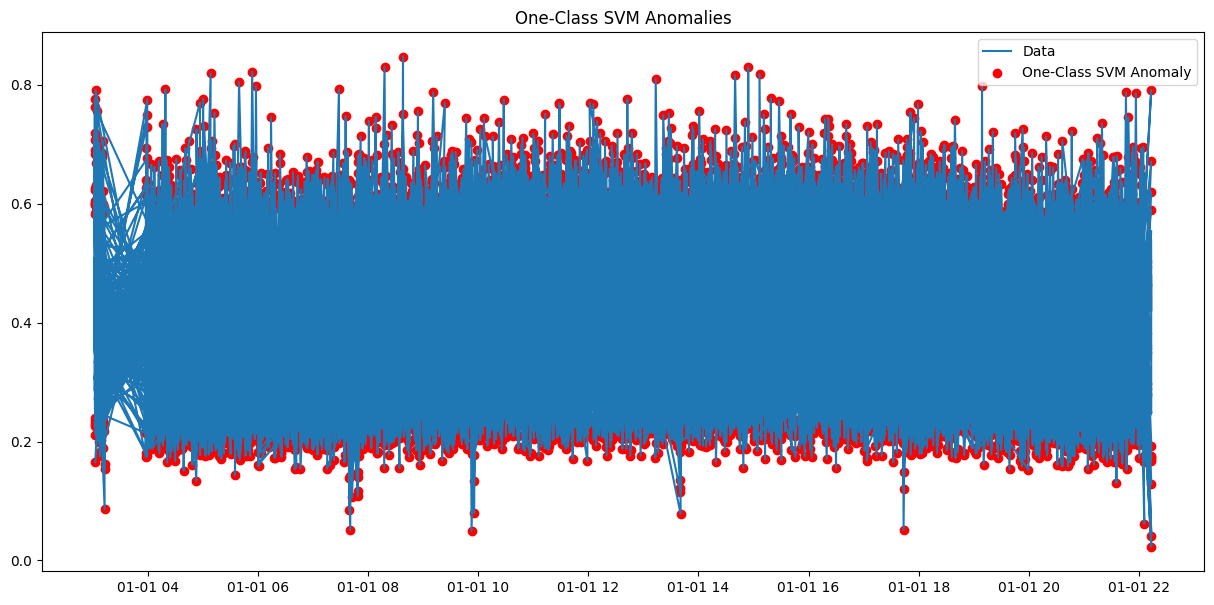

In [51]:
#One-Class SVM:

from sklearn.svm import OneClassSVM

# Fit the model
one_class_svm = OneClassSVM(nu=0.05, kernel="rbf", gamma=0.01)  # nu is an upper bound on the fraction of margin errors
svm_outliers = one_class_svm.fit_predict(data[['vibration_1_amplitude_m/s^2']])

# Mark outliers in the data
data['svm_outlier'] = svm_outliers

# Plotting
plt.figure(figsize=(15,7))
plt.plot(data['_time'], data['vibration_1_amplitude_m/s^2'], label='Data')
plt.scatter(data['_time'][data['svm_outlier'] == -1], data['vibration_1_amplitude_m/s^2'][data['svm_outlier'] == -1], color='red', label='One-Class SVM Anomaly')
plt.legend()
plt.title('One-Class SVM Anomalies')
plt.show()


In [52]:
#Isolation Forest:

from sklearn.ensemble import IsolationForest

# Training the model
iforest_model = IsolationForest(contamination=0.05)
iforest_predictions = iforest_model.fit_predict(data[['vibration_1_amplitude_m/s^2']])



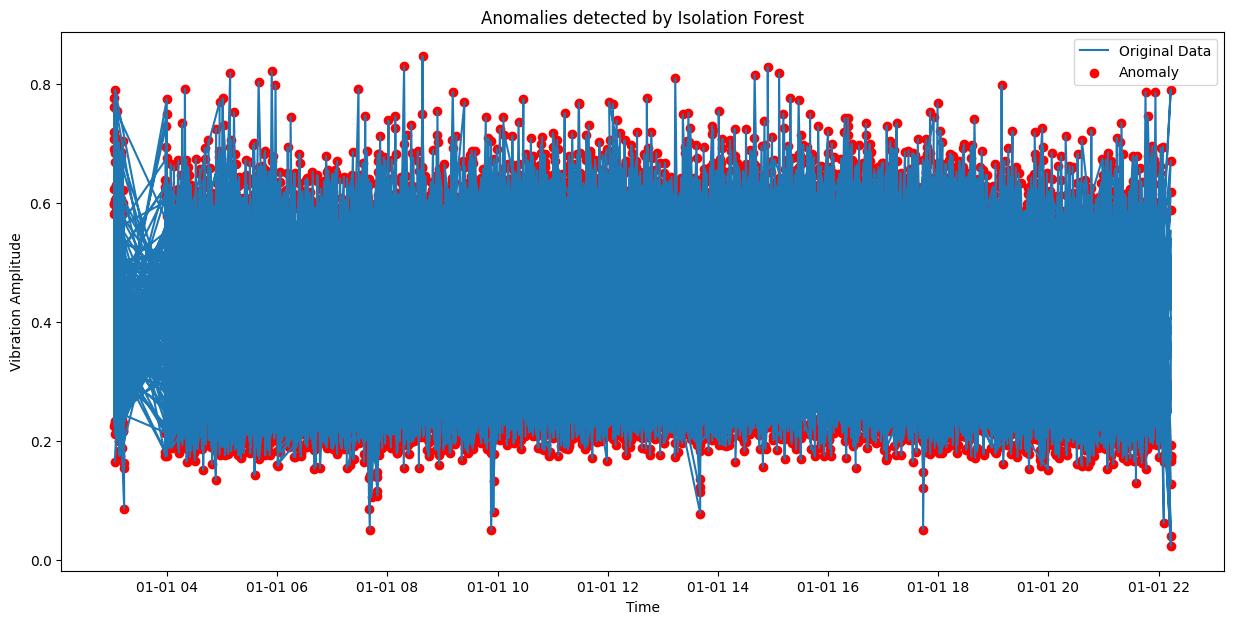

In [53]:
# Plotting original time series
plt.figure(figsize=(15, 7))
plt.plot(data['_time'], data['vibration_1_amplitude_m/s^2'], label='Original Data')

# Overlay anomalies
anomalies = data[iforest_predictions == -1]
plt.scatter(anomalies['_time'], anomalies['vibration_1_amplitude_m/s^2'], color='red', label='Anomaly')
plt.legend()
plt.title('Anomalies detected by Isolation Forest')
plt.xlabel('Time')
plt.ylabel('Vibration Amplitude')
plt.show()


In [54]:
#One-Class SVM model:

from sklearn.svm import OneClassSVM

# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['vibration_1_amplitude_m/s^2']])

# Training the model
ocsvm_model = OneClassSVM(kernel='rbf', nu=0.05)
ocsvm_predictions = ocsvm_model.fit_predict(data_scaled)



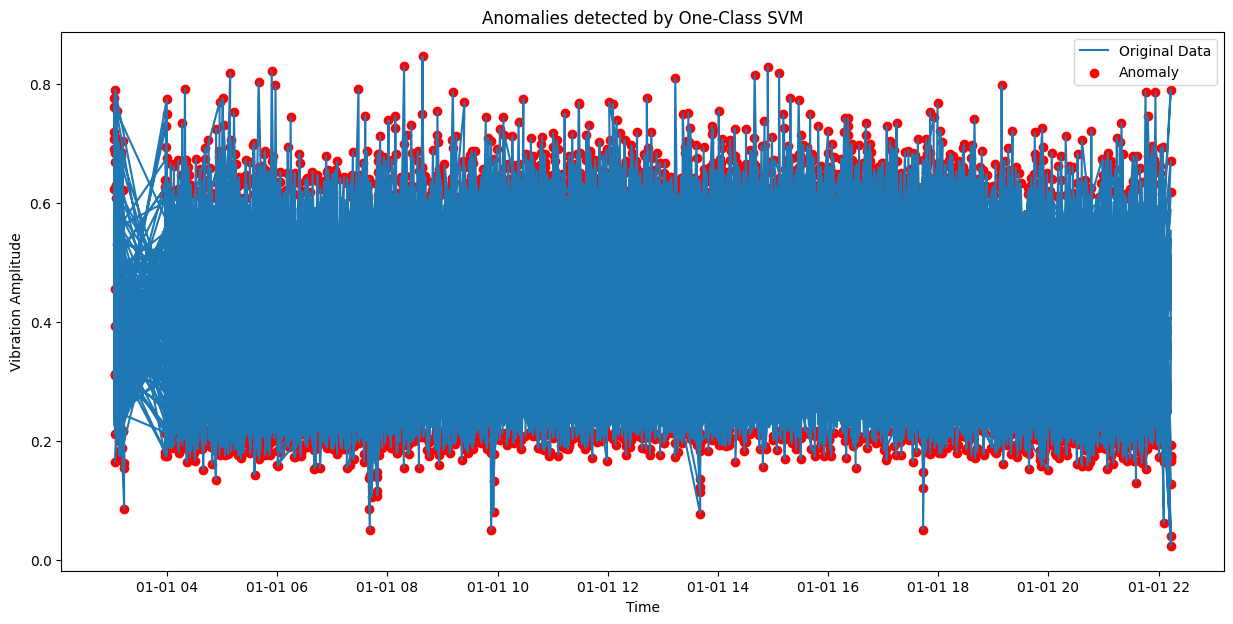

In [55]:
# Plotting original time series
plt.figure(figsize=(15, 7))
plt.plot(data['_time'], data['vibration_1_amplitude_m/s^2'], label='Original Data')

# Overlay anomalies
anomalies = data[ocsvm_predictions == -1]
plt.scatter(anomalies['_time'], anomalies['vibration_1_amplitude_m/s^2'], color='red', label='Anomaly')
plt.legend()
plt.title('Anomalies detected by One-Class SVM')
plt.xlabel('Time')
plt.ylabel('Vibration Amplitude')
plt.show()


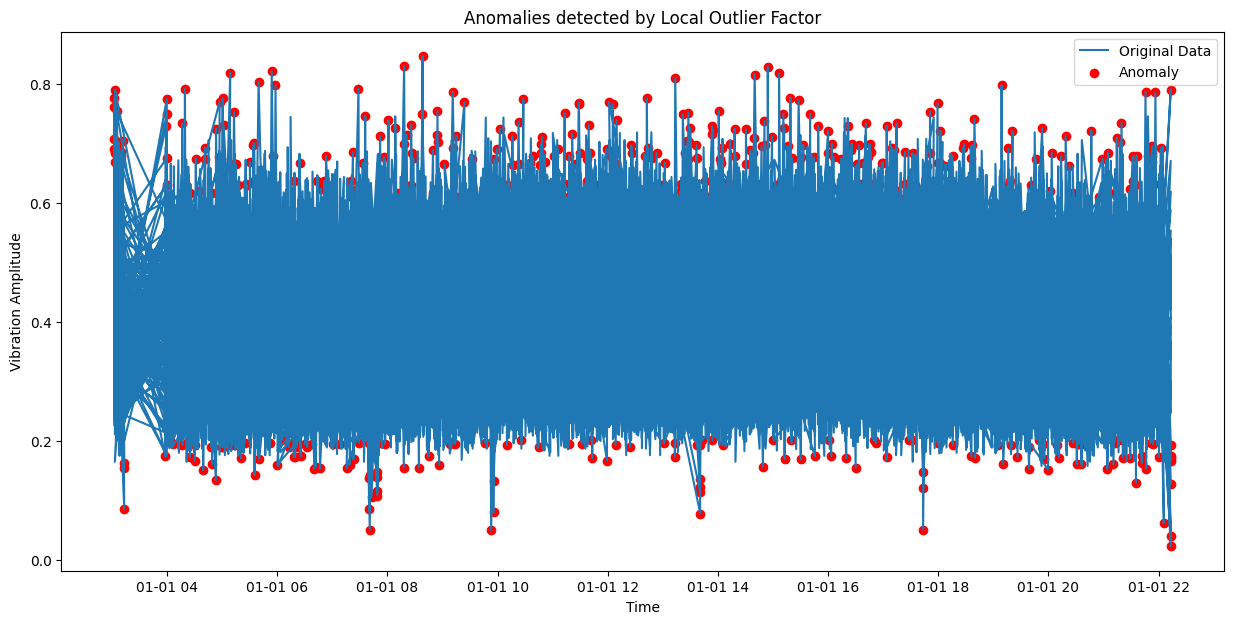

In [56]:
# Local Outlier Factor (LOF):

from sklearn.neighbors import LocalOutlierFactor

# Using LOF to detect anomalies
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
lof_predictions = lof.fit_predict(data[['vibration_1_amplitude_m/s^2']])

# Plotting original time series
plt.figure(figsize=(15, 7))
plt.plot(data['_time'], data['vibration_1_amplitude_m/s^2'], label='Original Data')

# Overlay anomalies
anomalies = data[lof_predictions == -1]
plt.scatter(anomalies['_time'], anomalies['vibration_1_amplitude_m/s^2'], color='red', label='Anomaly')
plt.legend()
plt.title('Anomalies detected by Local Outlier Factor')
plt.xlabel('Time')
plt.ylabel('Vibration Amplitude')
plt.show()


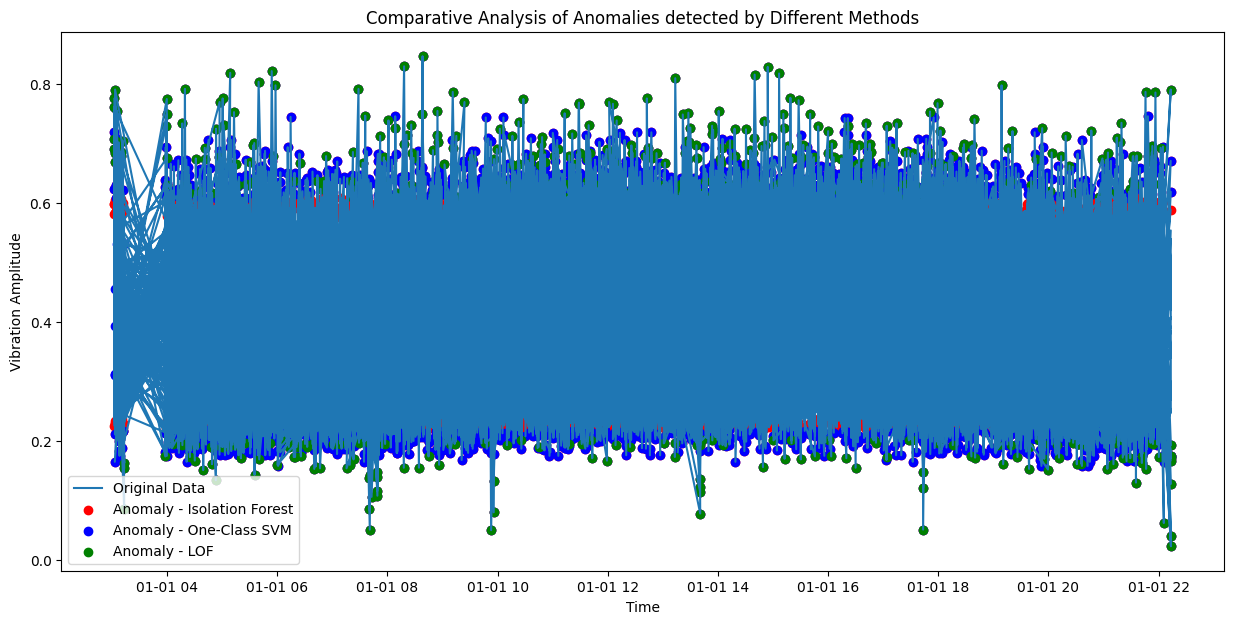

In [57]:
#Comparative Analysis:

plt.figure(figsize=(15, 7))
plt.plot(data['_time'], data['vibration_1_amplitude_m/s^2'], label='Original Data')

# Overlay anomalies detected by different methods
anomalies_iforest = data[iforest_predictions == -1]
anomalies_ocsvm = data[ocsvm_predictions == -1]
anomalies_lof = data[lof_predictions == -1]

plt.scatter(anomalies_iforest['_time'], anomalies_iforest['vibration_1_amplitude_m/s^2'], color='red', label='Anomaly - Isolation Forest')
plt.scatter(anomalies_ocsvm['_time'], anomalies_ocsvm['vibration_1_amplitude_m/s^2'], color='blue', label='Anomaly - One-Class SVM')
plt.scatter(anomalies_lof['_time'], anomalies_lof['vibration_1_amplitude_m/s^2'], color='green', label='Anomaly - LOF')

plt.legend()
plt.title('Comparative Analysis of Anomalies detected by Different Methods')
plt.xlabel('Time')
plt.ylabel('Vibration Amplitude')
plt.show()


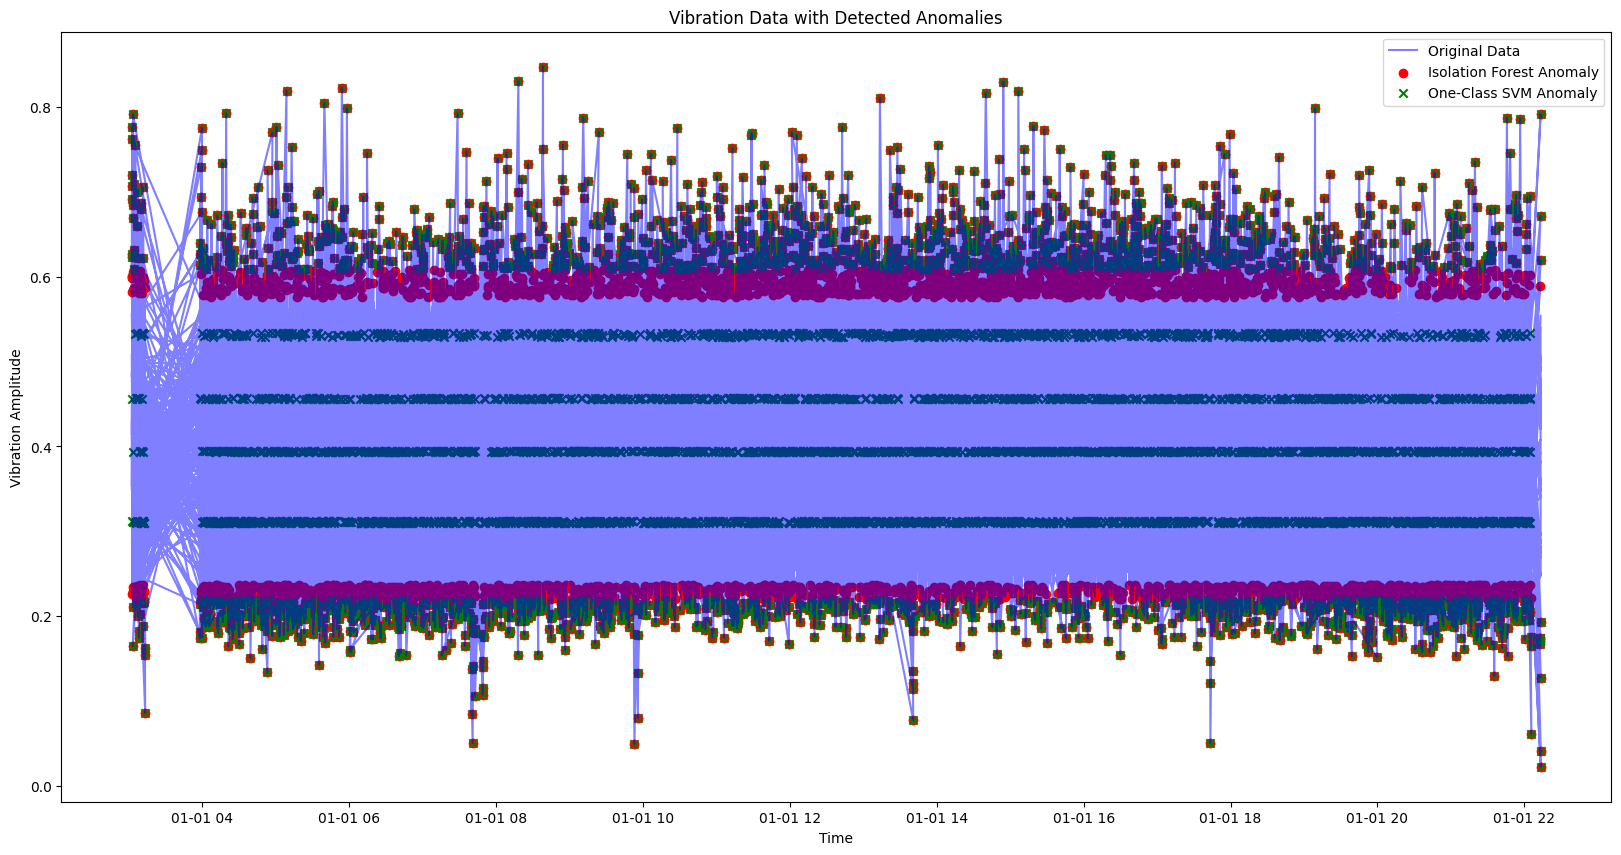

In [58]:
#Unified Time Series Plot

import matplotlib.pyplot as plt


# data: The original vibration data
# iforest_predictions: Anomalies detected by Isolation Forest (-1 indicates anomaly)
# ocsvm_predictions: Anomalies detected by One-Class SVM (-1 indicates anomaly)

plt.figure(figsize=(20,10))
plt.plot(data['_time'], data['vibration_1_amplitude_m/s^2'], label='Original Data', color='blue', alpha=0.5)
plt.scatter(data[iforest_predictions == -1]['_time'], data[iforest_predictions == -1]['vibration_1_amplitude_m/s^2'], color='red', label='Isolation Forest Anomaly')
plt.scatter(data[ocsvm_predictions == -1]['_time'], data[ocsvm_predictions == -1]['vibration_1_amplitude_m/s^2'], color='green', marker='x', label='One-Class SVM Anomaly')
plt.title('Vibration Data with Detected Anomalies')
plt.xlabel('Time')
plt.ylabel('Vibration Amplitude')
plt.legend()
plt.show()


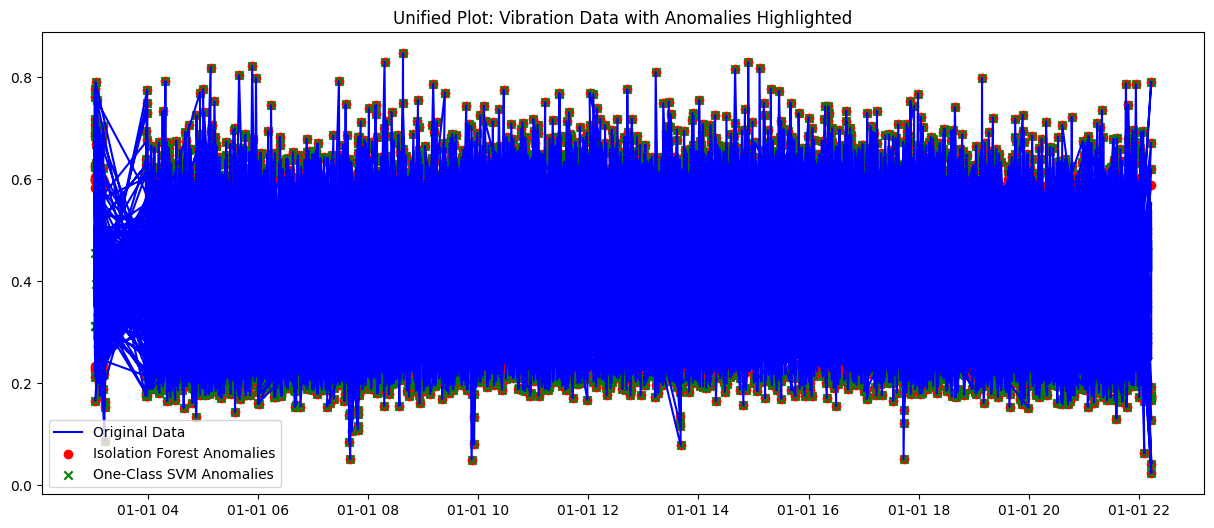

In [59]:
#Unified Time Series Plot

import matplotlib.pyplot as plt

# Extracting the anomaly predictions from the models
iforest_anomalies = data[iforest_predictions == -1]
ocsvm_anomalies = data[ocsvm_predictions == -1]

# Plotting the original data
plt.figure(figsize=(15, 6))
plt.plot(data['_time'], data['vibration_1_amplitude_m/s^2'], label='Original Data', color='blue')

# Overlaying the anomalies detected by the Isolation Forest model
plt.scatter(iforest_anomalies['_time'], iforest_anomalies['vibration_1_amplitude_m/s^2'], color='red', label='Isolation Forest Anomalies')

# Overlaying the anomalies detected by the One-Class SVM model
plt.scatter(ocsvm_anomalies['_time'], ocsvm_anomalies['vibration_1_amplitude_m/s^2'], color='green', marker='x', label='One-Class SVM Anomalies')

plt.legend()
plt.title('Unified Plot: Vibration Data with Anomalies Highlighted')
plt.show()


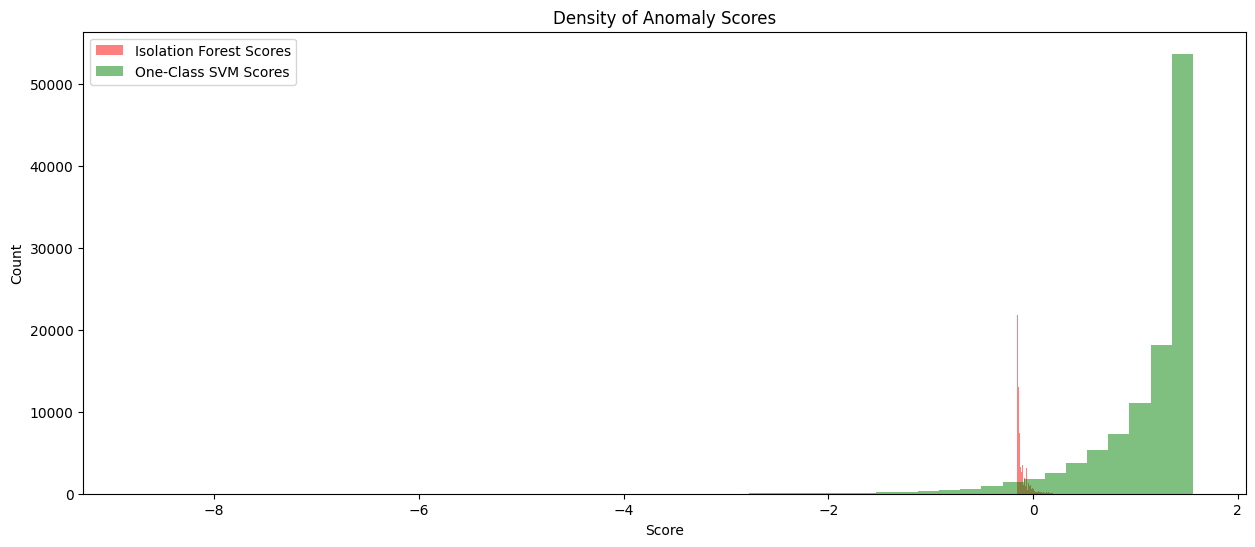

In [60]:
#Histogram or Density Plot of Scores:

plt.figure(figsize=(15, 6))

# Extracting scores for Isolation Forest
iforest_scores = -iso_forest.decision_function(data[['vibration_1_amplitude_m/s^2']])
plt.hist(iforest_scores, bins=50, alpha=0.5, label='Isolation Forest Scores', color='red')

# Extracting scores for One-Class SVM
ocsvm_scores = one_class_svm.decision_function(data[['vibration_1_amplitude_m/s^2']])
plt.hist(ocsvm_scores, bins=50, alpha=0.5, label='One-Class SVM Scores', color='green')

plt.legend()
plt.title('Density of Anomaly Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()


In [61]:
#silhouette scores:

from sklearn.metrics import silhouette_score

# Computing silhouette scores
iso_forest_silhouette = silhouette_score(data[['vibration_1_amplitude_m/s^2']], iso_forest.predict(data[['vibration_1_amplitude_m/s^2']]))
one_class_svm_silhouette = silhouette_score(data[['vibration_1_amplitude_m/s^2']], one_class_svm.predict(data[['vibration_1_amplitude_m/s^2']]))

print(f"Isolation Forest Silhouette Score: {iso_forest_silhouette}")
print(f"One-Class SVM Silhouette Score: {one_class_svm_silhouette}")


Isolation Forest Silhouette Score: 0.5415129897235479
One-Class SVM Silhouette Score: 0.5376236254600485


In [62]:
#Anomaly Analysis

#Isolation Forest:

from sklearn.ensemble import IsolationForest

# Training the model
iforest_model = IsolationForest(contamination=0.05)
iforest_predictions = iforest_model.fit_predict(data[['vibration_1_amplitude_m/s^2']])





In [63]:
import numpy as np

# Compute anomaly scores using the trained Isolation Forest model
data['scores_IsolationForest'] = iforest_model.decision_function(data[['vibration_1_amplitude_m/s^2']])

# 1. Determine the Threshold for Isolation Forest

# Extract the anomaly scores
anomaly_scores_forest = data['scores_IsolationForest']

# Determine the threshold using the 99.5th percentile
threshold_forest = np.percentile(anomaly_scores_forest, 99.5)
print(f"Threshold for Isolation Forest: {threshold_forest}")

# 2. Analyze Detected Anomalies

# Label anomalies based on the threshold
data['anomaly_forest'] = np.where(anomaly_scores_forest <= threshold_forest, -1, 1)  # Note the change to <=

# Extract timestamps of detected anomalies
anomaly_timestamps_forest = data[data['anomaly_forest'] == -1]['_time']

# Calculate time differences between consecutive anomalies
time_diffs_forest = anomaly_timestamps_forest.diff().dropna().dt.total_seconds() / (60*60)  # Convert to hours

print(f"Average time difference between anomalies (Isolation Forest): {time_diffs_forest.mean()} hours")


Threshold for Isolation Forest: 0.16780711566480405
Average time difference between anomalies (Isolation Forest): -0.00015533953449806668 hours


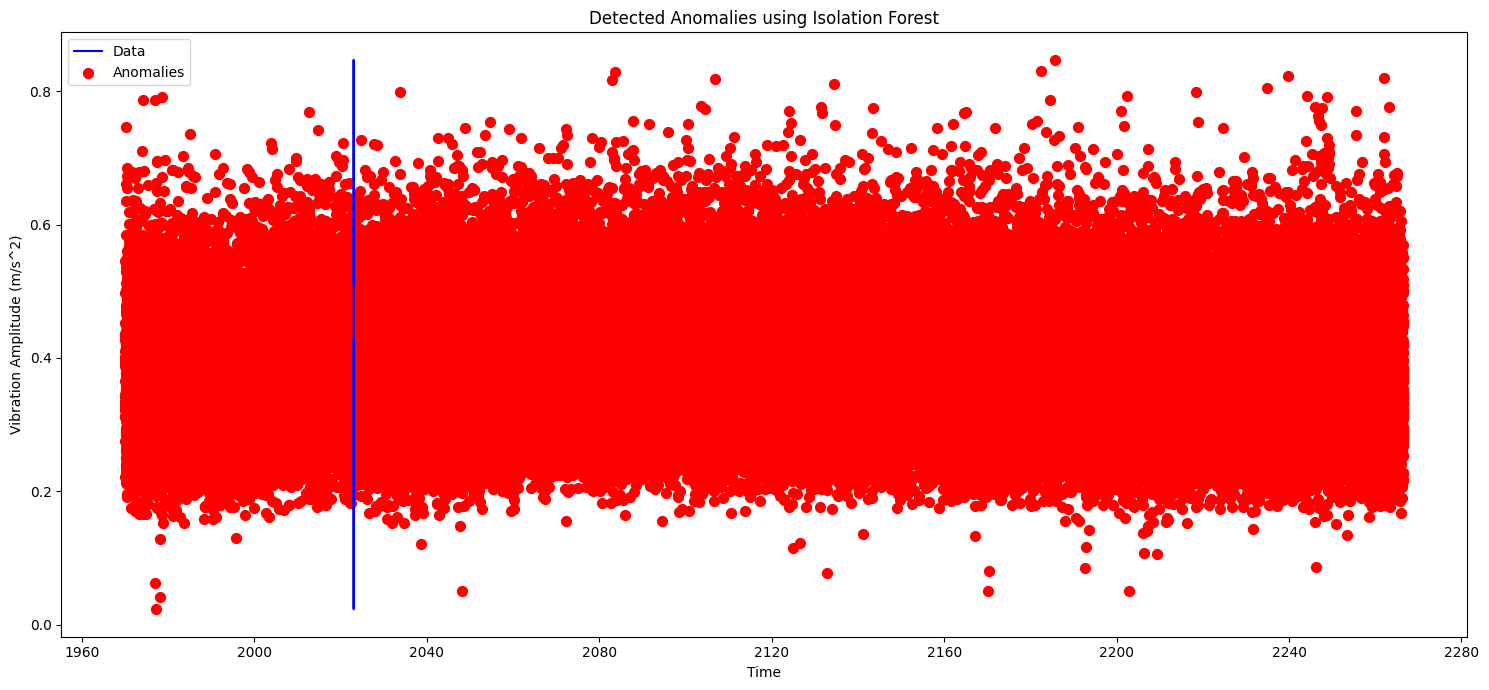

In [64]:
#visualizing the anomalies detected by the Isolation Forest model

import matplotlib.pyplot as plt

# Plotting the original data
plt.figure(figsize=(15, 7))
plt.plot(data['_time'], data['vibration_1_amplitude_m/s^2'], label='Data', color='blue')

# Highlighting the anomalies in red
anomalies = data[data['anomaly_forest'] == -1]['vibration_1_amplitude_m/s^2']
plt.scatter(anomalies.index, anomalies, color='red', label='Anomalies', s=50)

plt.legend()
plt.title('Detected Anomalies using Isolation Forest')
plt.xlabel('Time')
plt.ylabel('Vibration Amplitude (m/s^2)')
plt.tight_layout()
plt.show()


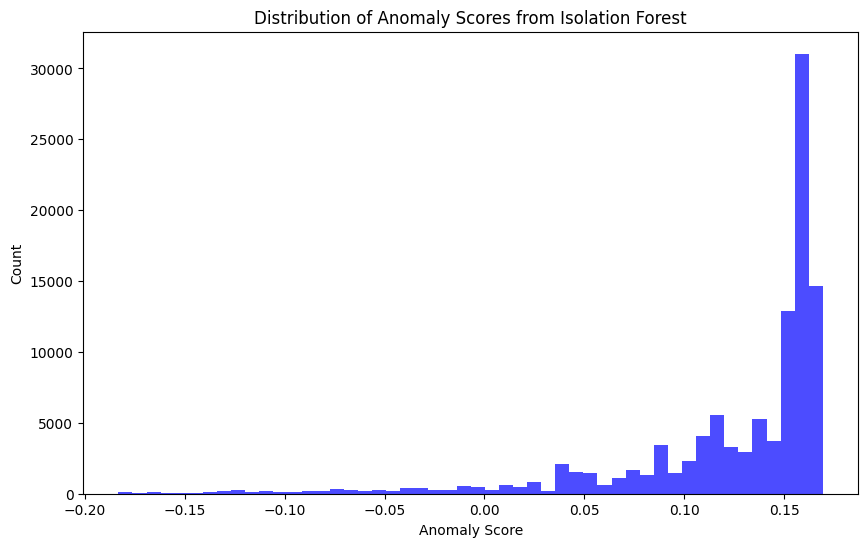

In [65]:
#visualizing the distribution of the anomaly scores

plt.figure(figsize=(10, 6))
plt.hist(anomaly_scores_forest, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Anomaly Scores from Isolation Forest')
plt.xlabel('Anomaly Score')
plt.ylabel('Count')
plt.show()


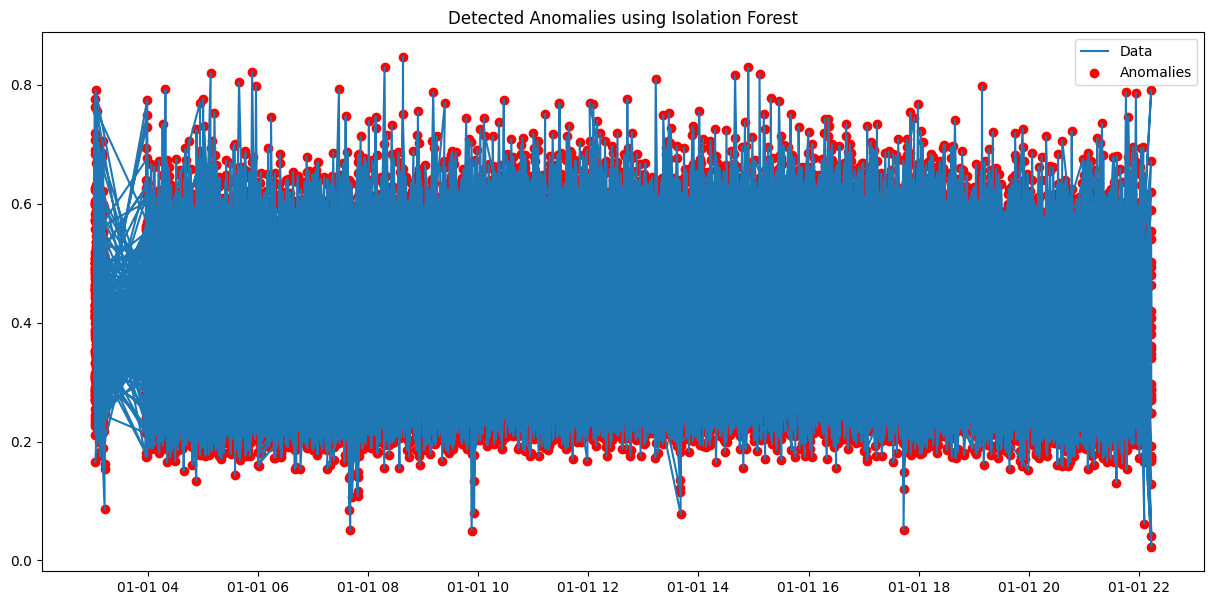

In [66]:
#Plot the detected anomalies against the actual data to visually assess the model's performance.

plt.figure(figsize=(15, 7))
plt.plot(data['_time'], data['vibration_1_amplitude_m/s^2'], label='Data')
plt.scatter(data[data['anomaly_forest'] == -1]['_time'], data[data['anomaly_forest'] == -1]['vibration_1_amplitude_m/s^2'], color='red', label='Anomalies')
plt.legend(loc='best')
plt.title('Detected Anomalies using Isolation Forest')
plt.show()


In [67]:
#Overlap Analysis



# Find the columns that might contain the anomaly labels for both models
potential_columns_forest = [col for col in data.columns if "isolationforest" in col.lower()]
potential_columns_svm = [col for col in data.columns if "oneclasssvm" in col.lower() or "svm" in col.lower()]

# Print potential columns for review
print("Potential columns for Isolation Forest:", potential_columns_forest)
print("Potential columns for One-Class SVM:", potential_columns_svm)



Potential columns for Isolation Forest: ['scores_IsolationForest']
Potential columns for One-Class SVM: ['svm_outlier']


In [68]:
# Get indices of anomalies detected by each model using the identified columns
anomalies_forest_indices = data[data['scores_IsolationForest'] == -1].index
anomalies_svm_indices = data[data['svm_outlier'] == -1].index

# Find common indices
common_anomalies = anomalies_forest_indices.intersection(anomalies_svm_indices)

print(f"Number of anomalies detected by Isolation Forest: {len(anomalies_forest_indices)}")
print(f"Number of anomalies detected by One-Class SVM: {len(anomalies_svm_indices)}")
print(f"Number of common anomalies detected by both models: {len(common_anomalies)}")


Number of anomalies detected by Isolation Forest: 0
Number of anomalies detected by One-Class SVM: 5331
Number of common anomalies detected by both models: 0


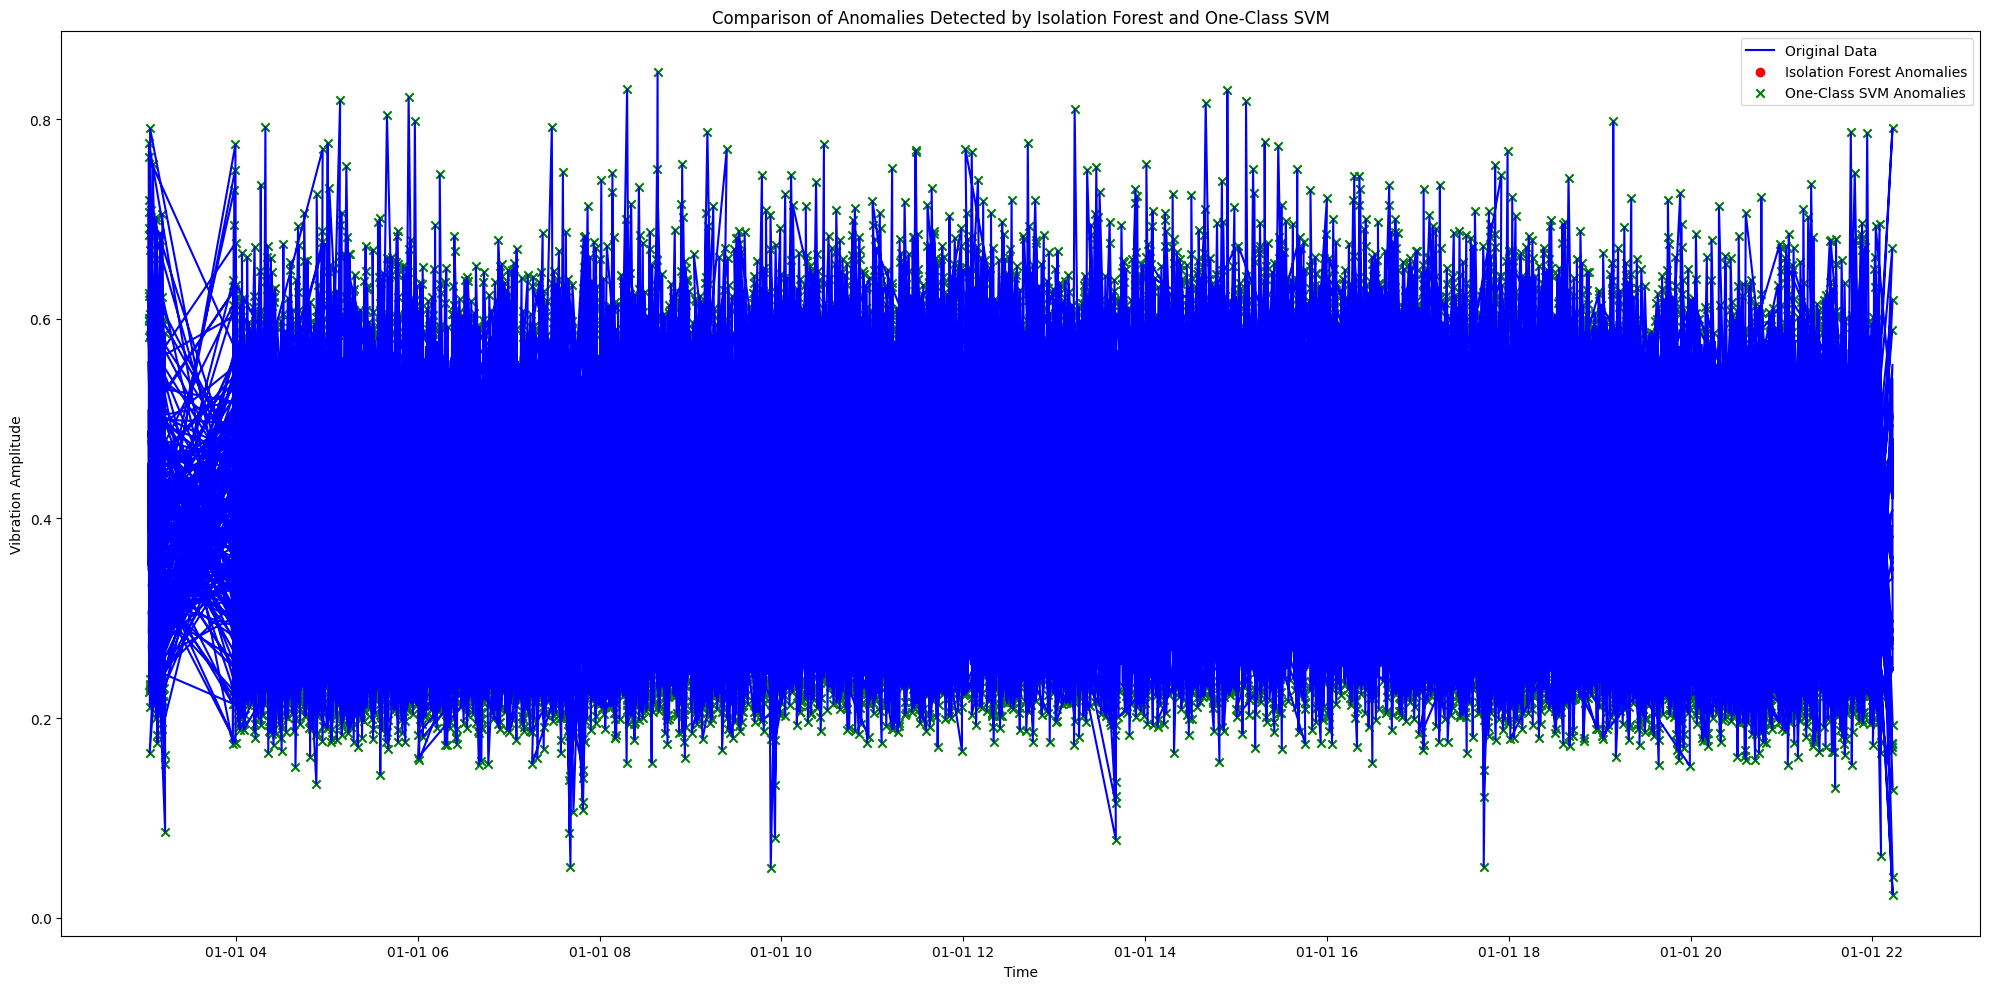

In [69]:
#Visual Assessment


import matplotlib.pyplot as plt

# Plotting the original time series data
plt.figure(figsize=(20, 10))
plt.plot(data['_time'], data['vibration_1_amplitude_m/s^2'], color='blue', label='Original Data')

# Overlaying the anomalies detected by Isolation Forest
forest_anomalies = data[data['scores_IsolationForest'] == -1]
plt.scatter(forest_anomalies['_time'], forest_anomalies['vibration_1_amplitude_m/s^2'], color='red', label='Isolation Forest Anomalies')

# Overlaying the anomalies detected by One-Class SVM
svm_anomalies = data[data['svm_outlier'] == -1]
plt.scatter(svm_anomalies['_time'], svm_anomalies['vibration_1_amplitude_m/s^2'], color='green', marker='x', label='One-Class SVM Anomalies')

plt.title('Comparison of Anomalies Detected by Isolation Forest and One-Class SVM')
plt.xlabel('Time')
plt.ylabel('Vibration Amplitude')
plt.legend()
plt.tight_layout()
plt.show()



In [70]:
#tabular comparison


# Extracting timestamps of anomalies
timestamps_forest = data[data['anomaly_forest'] == -1]['_time']
timestamps_svm = data[data['svm_outlier'] == -1]['_time']

# Find common timestamps
common_timestamps = set(timestamps_forest).intersection(set(timestamps_svm))

print(f"Number of anomalies detected by Isolation Forest: {len(timestamps_forest)}")
print(f"Number of anomalies detected by One-Class SVM: {len(timestamps_svm)}")
print(f"Number of common anomalies detected by both models: {len(common_timestamps)}")



Number of anomalies detected by Isolation Forest: 107875
Number of anomalies detected by One-Class SVM: 5331
Number of common anomalies detected by both models: 5331
